# Lab3 Lagrange Interpolation
Guillaume Collin, 261115974

## a) Implementation of Lagrange Interpolation

To do interpolation, we have learned about 3 different methods, Vandermonde, Lagrange and Newton method's. During this assignment, I will implement Vendermonde methods as it is extremely efficient to work with matrices in python. Also, I will compute the polynomial at a given x using Horner's scheme which will make the evaluation of the polynomial really efficient and accurate (Well, that is what I am hoping for.) 

Vendermonde:
           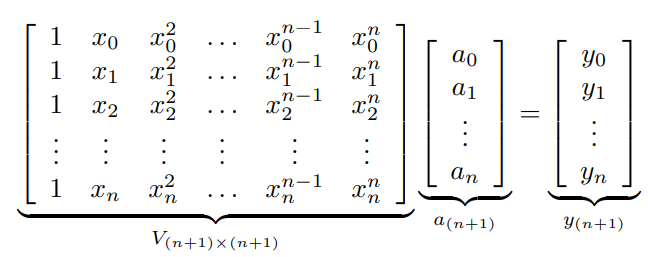
           (Source: https://orionquest.github.io/Numacom/lectures/interpolation.pdf)
           
Then, p(x) = a0 + a1x + ... + anx^n
But, we will use Horner's scheme: p(x) = a0 + x(a1+ x(...(a(n-1) +xan)...)), because as we saw many times, Horner's scheme is a very efficient and accurate way to compute polynomials.
           
I choose Vendermonde because its only downside is the cost of computation of the matrices and their multiplication. However, when we are using a computer (python program), this cost is non-existent as it is computed by the computer for us. On the other hand, since in Lagrange method there is a subtraction, the function will suffer from great cancellation of digit and propagation of error. Finally, I didn't choose Newton because Vendermonde felt the most efficient to me between the two because matrices are very "powerfull" in python.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#For my function implementation, I assume the passing arguments are: np.array of x (in order: [x0,x1,...,xn]) and the function f
#We make a function to get the coefficients so that we don't need to do it everytime we compute interpolation,
#This will further increase the efficiency of our function

def Vendermonde_coefficients(x_values, f):
    #First, I need my y_values:
    y_values = f(x_values)
    #We create our matrices:
    Vander = np.vander(x_values, len(x_values), increasing=True)
    y_mat = np.reshape(y_values, (len(y_values), 1))
    
    #Obtain our coefficient matrices:
    #Note: Vander matrix is supposed to be invertible by construction det /= 0
    Vander_inv = np.linalg.inv(Vander)
    return np.dot(Vander_inv, y_mat)


def Vendermonde_interpolation(coeff, x):
    #first, we transform coeff back into an np.array
    a_val = np.ravel(coeff)
    
    #We initialize the result with the first coefficient since its the only one that is not multiplied by x.
    result = a_val[-1]
    #Then, we do Horner's scheme:
    for i in range(len(a_val)-2, -1, -1):
        result = result*x + a_val[i]
    
    
    return result

### Now, some examples to show case my implementation.

#### 1) f1(x) = x^3, we test my interpolation for cubic functions. In interval: [-8, 8]

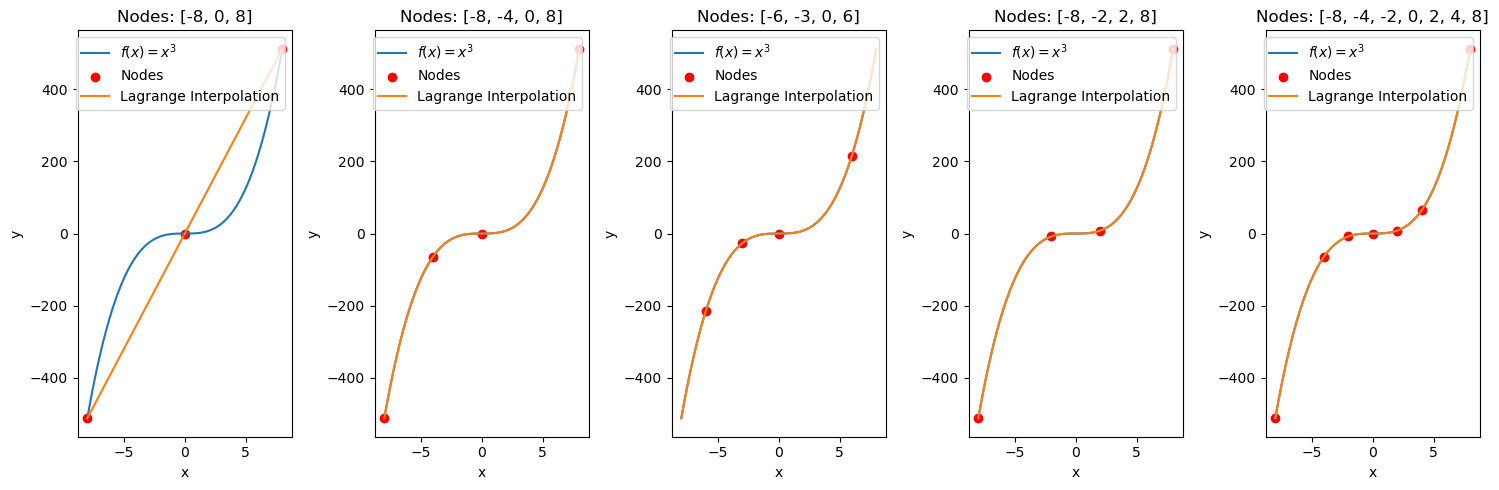

In [3]:
def f1(x):
    return x**3
#I am going to do multiple different interpolation with different set of nodes.

# Define the sets of nodes
nodes_set1 = np.array([-8, 0, 8])
nodes_set2 = np.array([-8, -4, 0, 8])
nodes_set3 = np.array([-6, -3, 0, 6])
nodes_set4 = np.array([-8, -2, 2, 8])
nodes_set5 = np.array([-8, -4, -2, 0, 2, 4, 8])

# Compute coefficients and interpolate for each set of nodes
coefficients_set1 = Vendermonde_coefficients(nodes_set1, f1)
coefficients_set2 = Vendermonde_coefficients(nodes_set2, f1)
coefficients_set3 = Vendermonde_coefficients(nodes_set3, f1)
coefficients_set4 = Vendermonde_coefficients(nodes_set4, f1)
coefficients_set5 = Vendermonde_coefficients(nodes_set5, f1)

# Generate values for smooth plot
x_smooth = np.linspace(-8, 8, 1000)
y_f_smooth = f1(x_smooth)
y_interp_smooth_set1 = [Vendermonde_interpolation(coefficients_set1, x) for x in x_smooth]
y_interp_smooth_set2 = [Vendermonde_interpolation(coefficients_set2, x) for x in x_smooth]
y_interp_smooth_set3 = [Vendermonde_interpolation(coefficients_set3, x) for x in x_smooth]
y_interp_smooth_set4 = [Vendermonde_interpolation(coefficients_set4, x) for x in x_smooth]
y_interp_smooth_set5 = [Vendermonde_interpolation(coefficients_set5, x) for x in x_smooth]

# Plot the results
plt.figure(figsize=(15, 5))

# Set 1
plt.subplot(1, 5, 1)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = x^3$')
plt.scatter(nodes_set1, f1(nodes_set1), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set1, label='Lagrange Interpolation')
plt.title('Nodes: [-8, 0, 8]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 2
plt.subplot(1, 5, 2)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = x^3$')
plt.scatter(nodes_set2, f1(nodes_set2), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set2, label='Lagrange Interpolation')
plt.title('Nodes: [-8, -4, 0, 8]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 3
plt.subplot(1, 5, 3)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = x^3$')
plt.scatter(nodes_set3, f1(nodes_set3), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set3, label='Lagrange Interpolation')
plt.title('Nodes: [-6, -3, 0, 6]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 4
plt.subplot(1, 5, 4)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = x^3$')
plt.scatter(nodes_set4, f1(nodes_set4), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set4, label='Lagrange Interpolation')
plt.title('Nodes: [-8, -2, 2, 8]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 5
plt.subplot(1, 5, 5)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = x^3$')
plt.scatter(nodes_set5, f1(nodes_set5), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set5, label='Lagrange Interpolation')
plt.title('Nodes: [-8, -4, -2, 0, 2, 4, 8]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

In the 5 examples above, one involved quadratic interpolation (3 nodes), 3 involveld cubic interpolation (4 nodes) and 1 involved interpolation with 7 nodes. Notably, the quadratic interpolation exhibited significant deviation from an accurate approximation. I would say that it doesnt even look quadratic, it looks like a linear function (which is very far from cubic). However, when using cubic interpolation (4 nodes) (3 middle examples) the difference between the actual function (f(x)=x^3) and the interpolated approximation is barely visible. This suggests an exceptionnally high level of accuracy in my interpolation method for cubic functions.

In the case of the interpolation with 7 nodes, the visual distinction between the true function and the interpolated result is invisible to the naked eye (well at least my eye). Consequently, it appears that my interpolation method is remarkably precise when applied to cubic functions.

#### 2) f2(x) = sin(x), we test my interpolation for oscillating/periodic functions. In interval: [-pi/2, pi/2]

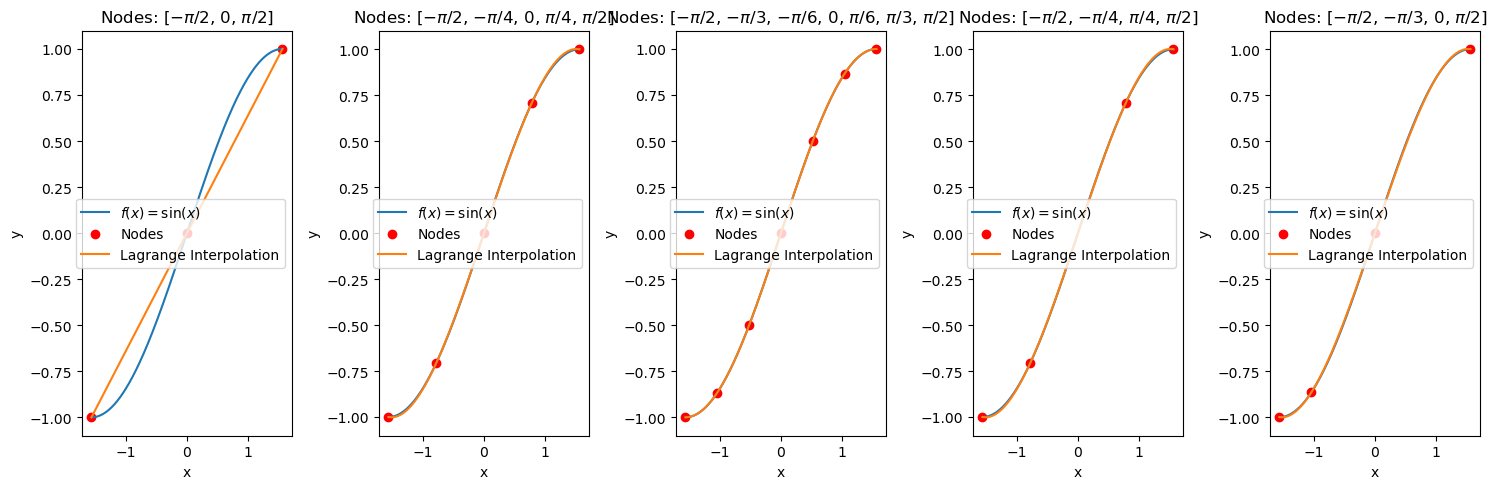

In [4]:
# Define the function
def f2(x):
    return np.sin(x)

# Define the sets of nodes
nodes_set1 = np.array([-np.pi/2, 0, np.pi/2])
nodes_set2 = np.array([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
nodes_set3 = np.array([-np.pi/2, -np.pi/3, -np.pi/6, 0, np.pi/6, np.pi/3, np.pi/2])
nodes_set4 = np.array([-np.pi/2, -np.pi/4, np.pi/4, np.pi/2])
nodes_set5 = np.array([-np.pi/2, -np.pi/3, 0, np.pi/2])

# Compute coefficients and interpolate for each set of nodes
coefficients_set1 = Vendermonde_coefficients(nodes_set1, f2)
coefficients_set2 = Vendermonde_coefficients(nodes_set2, f2)
coefficients_set3 = Vendermonde_coefficients(nodes_set3, f2)
coefficients_set4 = Vendermonde_coefficients(nodes_set4, f2)
coefficients_set5 = Vendermonde_coefficients(nodes_set5, f2)

# Generate values for smooth plot
x_smooth = np.linspace(-np.pi/2, np.pi/2, 1000)
y_f_smooth = f2(x_smooth)
y_interp_smooth_set1 = [Vendermonde_interpolation(coefficients_set1, x) for x in x_smooth]
y_interp_smooth_set2 = [Vendermonde_interpolation(coefficients_set2, x) for x in x_smooth]
y_interp_smooth_set3 = [Vendermonde_interpolation(coefficients_set3, x) for x in x_smooth]
y_interp_smooth_set4 = [Vendermonde_interpolation(coefficients_set4, x) for x in x_smooth]
y_interp_smooth_set5 = [Vendermonde_interpolation(coefficients_set5, x) for x in x_smooth]

# Plot the results
plt.figure(figsize=(15, 5))

# Set 1
plt.subplot(1, 5, 1)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \sin(x)$')
plt.scatter(nodes_set1, f2(nodes_set1), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set1, label='Lagrange Interpolation')
plt.title('Nodes: [$-\pi/2$, 0, $\pi/2$]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 2
plt.subplot(1, 5, 2)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \sin(x)$')
plt.scatter(nodes_set2, f2(nodes_set2), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set2, label='Lagrange Interpolation')
plt.title('Nodes: [$-\pi/2$, $-\pi/4$, 0, $\pi/4$, $\pi/2$]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 3
plt.subplot(1, 5, 3)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \sin(x)$')
plt.scatter(nodes_set3, f2(nodes_set3), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set3, label='Lagrange Interpolation')
plt.title('Nodes: [$-\pi/2$, $-\pi/3$, $-\pi/6$, 0, $\pi/6$, $\pi/3$, $\pi/2$]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 4
plt.subplot(1, 5, 4)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \sin(x)$')
plt.scatter(nodes_set4, f2(nodes_set4), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set4, label='Lagrange Interpolation')
plt.title('Nodes: [$-\pi/2$, $-\pi/4$, $\pi/4$, $\pi/2$]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 5
plt.subplot(1, 5, 5)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \sin(x)$')
plt.scatter(nodes_set5, f2(nodes_set5), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set5, label='Lagrange Interpolation')
plt.title('Nodes: [$-\pi/2$, $-\pi/3$, 0, $\pi/2$]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

In the 5 examples above, 1 involved quadratic interpolation (3 nodes), 2 involved cubic interpolation (4 nodes), 1 involved interpolation with 5 nodes and, 1 involved interpolation with 7 nodes. Notably, the quadratic interpolation exhibited significant deviation from an accurate approximation, Just like for our cubic function (x^3), it ressembles a linear function, which is very far from the function sin(x). However, when using cubic interpolation (4 nodes)(the last 2 examples), the difference between the actual function (sin(x)) and the interpolated approximation is barely visible. We can only see a small difference close to the bounds (the little bit of blue). This suggests an exceptionnally high level of accuracy in my interpolation method for cubic functions.

In the case of interpolation with 5 nodes, we have the same problem as for the cubic interpolation (4 node), as we can see on the example (example #2 from left to right), we can only see a small difference close to the bounds (the little bit of blue).

In the case of interpolation with 7 nodes, the visual distinction between the true function and the interpolated result is invisible to the naked eye (well at least my eye). Consequently, it appears that my interpolated method is remarkably precise when applied to cubic functions.

#### 3) f3(x) = 1/x, we test my interpolation for function that have an asymptote (here x=0). In interval: [-4, 4]

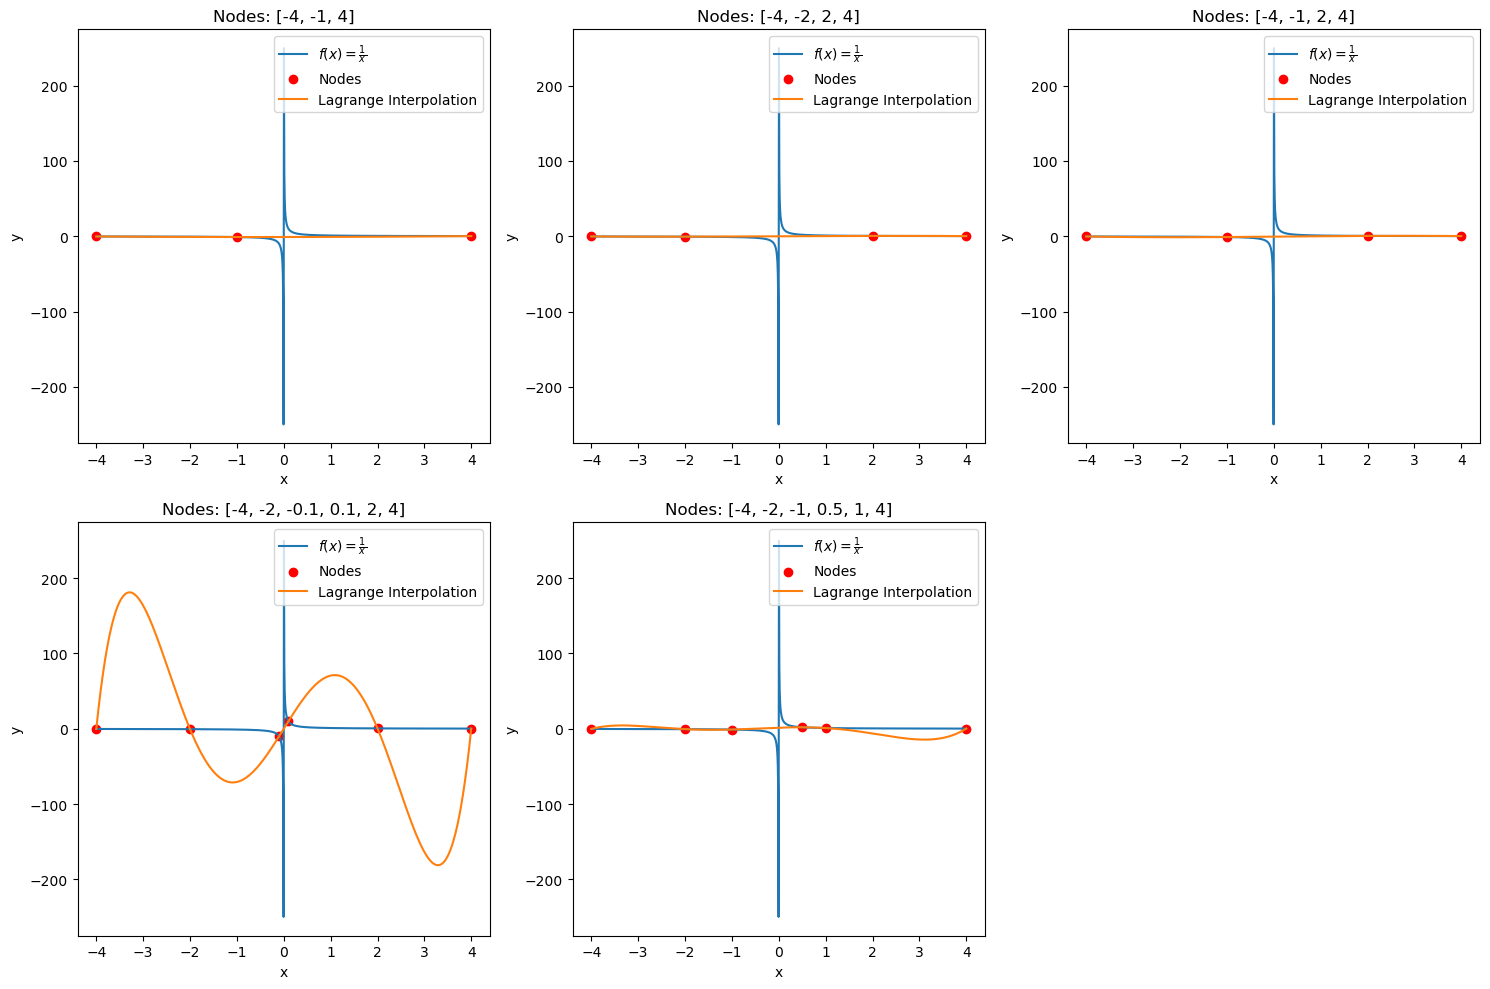

In [5]:
def f3(x):
    return 1/x

# Define the sets of nodes
nodes_set1 = np.array([-4, -1, 4])
nodes_set2 = np.array([-4, -2, 2, 4])
nodes_set3 = np.array([-4, -1, 2, 4])
nodes_set4 = np.array([-4, -2, -0.1, 0.1, 2, 4])
nodes_set5 = np.array([-4, -2, -1, 0.5, 1, 4])

# Compute coefficients and interpolate for each set of nodes
coefficients_set1 = Vendermonde_coefficients(nodes_set1, f3)
coefficients_set2 = Vendermonde_coefficients(nodes_set2, f3)
coefficients_set3 = Vendermonde_coefficients(nodes_set3, f3)
coefficients_set4 = Vendermonde_coefficients(nodes_set4, f3)
coefficients_set5 = Vendermonde_coefficients(nodes_set5, f3)

# Generate values for smooth plot
x_smooth = np.linspace(-4, 4, 1000)
y_f_smooth = f3(x_smooth)
y_interp_smooth_set1 = [Vendermonde_interpolation(coefficients_set1, x) for x in x_smooth]
y_interp_smooth_set2 = [Vendermonde_interpolation(coefficients_set2, x) for x in x_smooth]
y_interp_smooth_set3 = [Vendermonde_interpolation(coefficients_set3, x) for x in x_smooth]
y_interp_smooth_set4 = [Vendermonde_interpolation(coefficients_set4, x) for x in x_smooth]
y_interp_smooth_set5 = [Vendermonde_interpolation(coefficients_set5, x) for x in x_smooth]

# Plot the results
plt.figure(figsize=(15, 10))

# Set 1
plt.subplot(2, 3, 1)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set1, f3(nodes_set1), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set1, label='Lagrange Interpolation')
plt.title('Nodes: [-4, -1, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 2
plt.subplot(2, 3, 2)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set2, f3(nodes_set2), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set2, label='Lagrange Interpolation')
plt.title('Nodes: [-4, -2, 2, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 3
plt.subplot(2, 3, 3)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set3, f3(nodes_set3), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set3, label='Lagrange Interpolation')
plt.title('Nodes: [-4, -1, 2, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 4
plt.subplot(2, 3, 4)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set4, f3(nodes_set4), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set4, label='Lagrange Interpolation')
plt.title('Nodes: [-4, -2, -0.1, 0.1, 2, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 5
plt.subplot(2, 3, 5)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set5, f3(nodes_set5), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set5, label='Lagrange Interpolation')
plt.title('Nodes: [-4, -2, -1, 0.5, 1, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

As we can see, interpolating functions with asymptotes poses a significant challenge, leading to poor approximation even with 6 nodes. To overcome this limitation, we'll attempt the interpolation of 1/x again. This time, we'll focus on the domain ]0, 4] to avoid the asymptote at x=0. This should provide a more accurate interpolation without the complications introduced by the asymptotic behaviour.

Note: We can perform this interpolation confidently because the function 1/x is odd. This means that to compute for negative x, we simply need to negate the value obtained for the positive x. This property simplifies the interpolation process and ensures consistency across both positive and negative values of x.

Let's proceed with the updated domain:

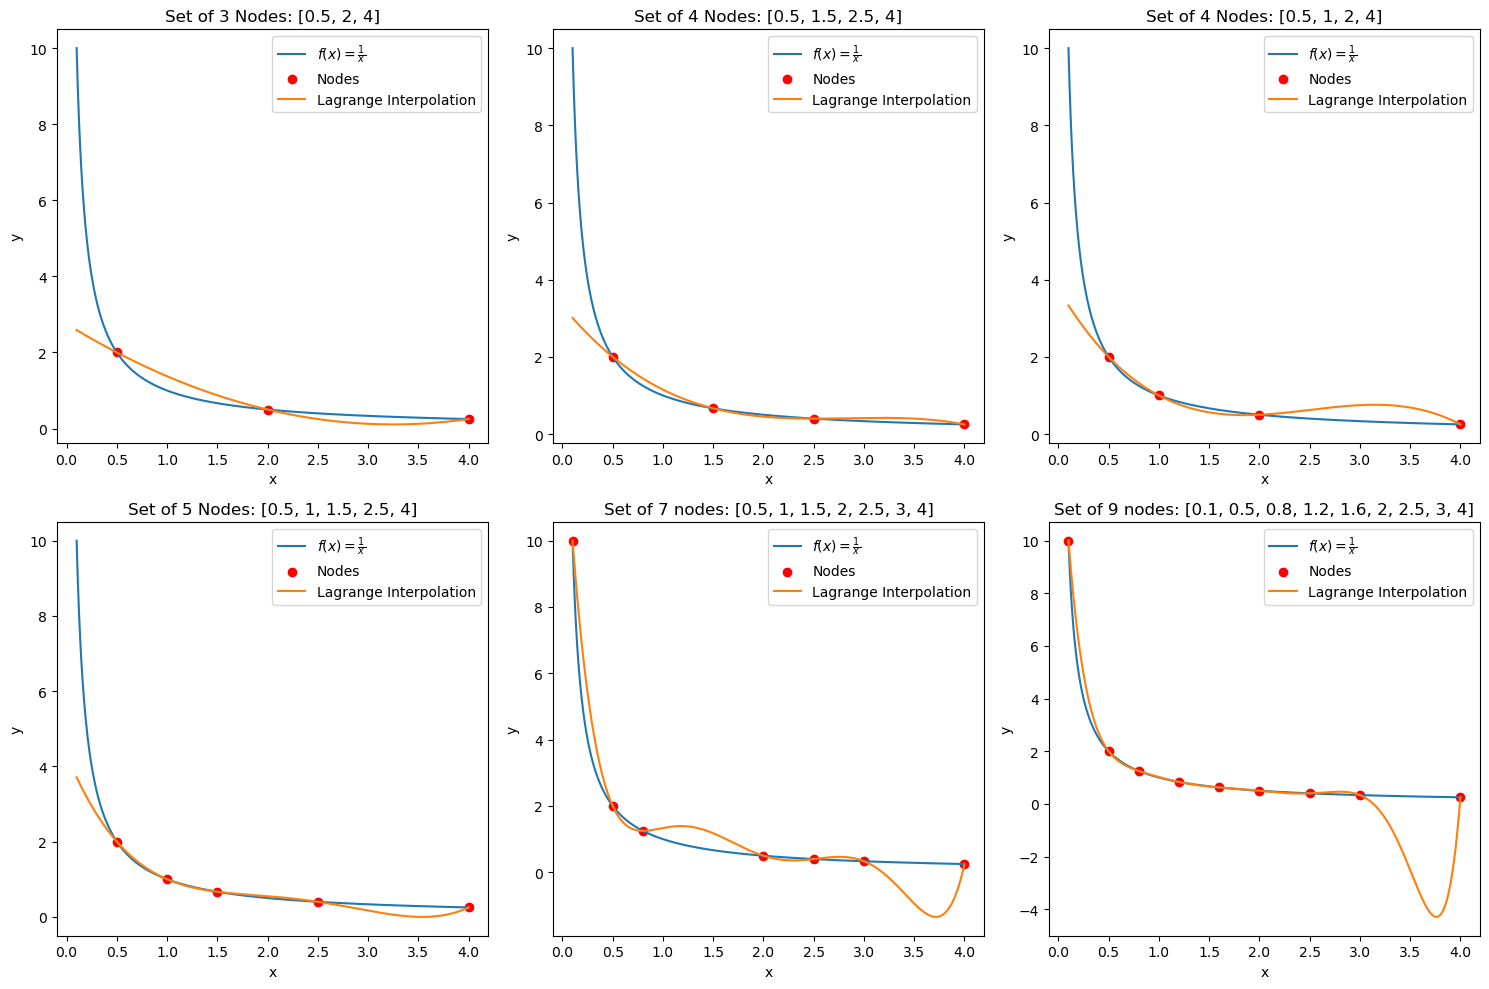

In [6]:
def f4(x):
    return 1/x

# Define the sets of nodes
nodes_set1 = np.array([0.5, 2, 4])
nodes_set2 = np.array([0.5, 1.5, 2.5, 4])
nodes_set3 = np.array([0.5, 1, 2, 4])
nodes_set4 = np.array([0.5, 1, 1.5, 2.5, 4])
nodes_set5 = np.array([0.1, 0.5, 0.8, 2, 2.5, 3, 4])
nodes_set6 = np.array([0.1, 0.5, 0.8, 1.2, 1.6, 2, 2.5, 3, 4])

# Compute coefficients and interpolate for each set of nodes
coefficients_set1 = Vendermonde_coefficients(nodes_set1, f4)
coefficients_set2 = Vendermonde_coefficients(nodes_set2, f4)
coefficients_set3 = Vendermonde_coefficients(nodes_set3, f4)
coefficients_set4 = Vendermonde_coefficients(nodes_set4, f4)
coefficients_set5 = Vendermonde_coefficients(nodes_set5, f4)
coefficients_set6 = Vendermonde_coefficients(nodes_set6, f4)

# Generate values for smooth plot
x_smooth = np.linspace(0.1, 4, 1000)  # Start from 0.1 to avoid division by zero
y_f_smooth = f4(x_smooth)
y_interp_smooth_set1 = [Vendermonde_interpolation(coefficients_set1, x) for x in x_smooth]
y_interp_smooth_set2 = [Vendermonde_interpolation(coefficients_set2, x) for x in x_smooth]
y_interp_smooth_set3 = [Vendermonde_interpolation(coefficients_set3, x) for x in x_smooth]
y_interp_smooth_set4 = [Vendermonde_interpolation(coefficients_set4, x) for x in x_smooth]
y_interp_smooth_set5 = [Vendermonde_interpolation(coefficients_set5, x) for x in x_smooth]
y_interp_smooth_set6 = [Vendermonde_interpolation(coefficients_set6, x) for x in x_smooth]

# Plot the results
plt.figure(figsize=(15, 10))

# Set 1
plt.subplot(2, 3, 1)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set1, f4(nodes_set1), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set1, label='Lagrange Interpolation')
plt.title('Set of 3 Nodes: [0.5, 2, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 2
plt.subplot(2, 3, 2)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set2, f4(nodes_set2), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set2, label='Lagrange Interpolation')
plt.title('Set of 4 Nodes: [0.5, 1.5, 2.5, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 3
plt.subplot(2, 3, 3)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set3, f4(nodes_set3), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set3, label='Lagrange Interpolation')
plt.title('Set of 4 Nodes: [0.5, 1, 2, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 4
plt.subplot(2, 3, 4)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set4, f4(nodes_set4), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set4, label='Lagrange Interpolation')
plt.title('Set of 5 Nodes: [0.5, 1, 1.5, 2.5, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 5
plt.subplot(2, 3, 5)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set5, f4(nodes_set5), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set5, label='Lagrange Interpolation')
plt.title('Set of 7 nodes: [0.5, 1, 1.5, 2, 2.5, 3, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Set 6
plt.subplot(2, 3, 6)
plt.plot(x_smooth, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_set6, f4(nodes_set6), color='red', label='Nodes')
plt.plot(x_smooth, y_interp_smooth_set6, label='Lagrange Interpolation')
plt.title('Set of 9 nodes: [0.1, 0.5, 0.8, 1.2, 1.6, 2, 2.5, 3, 4]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

Interpolating the function f(x) = 1/x poses a challenge due to its asymptotic behavior as x approaches 0. As we observed in our examples, reducing the domain can improve the accuracy, but accurate interpolation remains challenging. The function's sharp changes near 0 and its unbounded behavior make it hard for interpolation to capture its nuances accuratly.

In the cases with a smaller number of nodes, such as 3 and 4, the interpolation struggles to accurately represent the function, especially for values of x that are not in the domain of the nodes. (here, for all 3, for x<0.5, we can see a big deviation from the true function). Even with a larger number of nodes, like 7 and 9, accurate interpolation becomes doable in certain regions, but the challenge persists, particularly close to the bounds. In the interpolation of 9 nodes, it is almost accurate, but the region between 3 and 4 is very far from the true function whilst the rest of the interpolation is a good estimate. 

This difficulty arises from the function's (1/x) unbounded nature and rapid changes, leading to interpolation inaccuracies in specific intervals. The inherent characteristics of f(x) = 1/x such as its singularity at x=0 and infinite values for x close to 0, contributes to the complexity encountered during the interpolation process. 

Therefore, we can conclude that our implementation lacks the ability to interpolate accurately functions with asymptotic behaviors. However, this difficulty is not unique to our implementation, as interpolating asymptotic functions poses inherent challenges for various interpolation methods. 

Several reasons contribute to the difficulty of interpolating asymptotic functions. First, the rapid changes and unbounded nature of these functions introduces challenges in representing their behavior between widely spaced nodes. Additionally, the presence of singularities or points of discontinuity (here x=0) further complicates the interpolation process. The inherent characteristics of asymptotic functions, such as approaching infinity or zero, make it inherently challenging to construct an interpolation that precisely captures the intricate details of the function's behavior in theses regions.

##### Conclusion
While its true that my implementation faces challenge in precisely interpolating asymptotic functions with a relatively low number of nodes (ranging from 3 to 9), its essential to acknowledge the overall efficacy of my implementation. That is, when we use a large number of nodes, we can get a very accurate approximation:

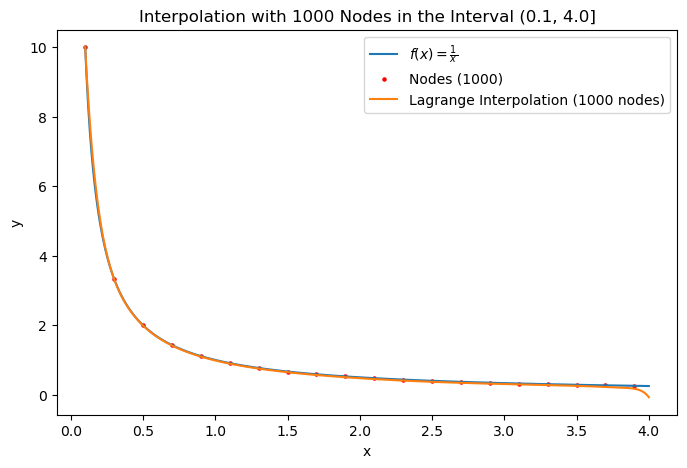

In [7]:
# Generate nodes in the interval (0.1, 4.0] with a step size of 0.01 for 1000 nodes
nodes_1000 = np.arange(0.1, 4.01, 0.2)

# Compute coefficients and interpolate
coefficients_1000 = Vendermonde_coefficients(nodes_1000, f4)

# Generate values for smooth plot
x_smooth_1000 = np.linspace(0.1, 4, 1000)
y_interp_smooth_1000 = [Vendermonde_interpolation(coefficients_1000, x) for x in x_smooth_1000]

# Plot the results for 1000 nodes
plt.figure(figsize=(8, 5))
plt.plot(x_smooth_1000, y_f_smooth, label='$f(x) = \\frac{1}{x}$')
plt.scatter(nodes_1000, f4(nodes_1000), color='red', s=5, label='Nodes (1000)')
plt.plot(x_smooth_1000, y_interp_smooth_1000, label='Lagrange Interpolation (1000 nodes)')
plt.title('Interpolation with 1000 Nodes in the Interval (0.1, 4.0]')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## b) Maximum Error function

In [8]:
def maximum_error(nodes, a, b, true_function, resolution=1000):
    #We get 1000 equally spaced nodes
    x_values = np.linspace(a, b, resolution)
    #We get the coefficients
    coeff = Vendermonde_coefficients(nodes, true_function)
    #We get the y values for true and interpolation
    y_inter = [Vendermonde_interpolation(coeff, x) for x in x_values]
    y_true = true_function(x_values)
    #We compute the error:
    errors = np.abs((y_true - y_inter)/(np.maximum(1e-16, np.abs(y_true)))) #To not get division by 0 error
    max_error = np.max(errors)
    return max_error

### Now some examples.
We reuse the examples we did for the first question.

#### 1) f(x) = x^3. In interval [-8,8]

In [9]:
def fe(x):
    return x**3

# Define the sets of nodes
nodes_sets = [
    np.array([-8, 0, 8]),
    np.array([-8, -4, 0, 8]),
    np.array([-6, -3, 0, 6]),
    np.array([-8, -2, 2, 8]),
    np.array([-8, -4, -2, 0, 2, 4, 8]),
]

# Iterate over nodes sets
for nodes in nodes_sets:
    # Compute maximum error
    max_error = maximum_error(nodes, -8, 8, fe)
    
    # Print information for each set of nodes
    print("Nodes:", nodes)
    print("Max relative error:", max_error)
    print("\n" + "="*40 + "\n")  # Separation line


Nodes: [-8  0  8]
Max relative error: 998000.0000000449


Nodes: [-8 -4  0  8]
Max relative error: 2.213791370220266e-16


Nodes: [-6 -3  0  6]
Max relative error: 2.6267153465017603e-08


Nodes: [-8 -2  2  8]
Max relative error: 1.3850037854716788e-11


Nodes: [-8 -4 -2  0  2  4  8]
Max relative error: 5.548328442786366e-08




##### Observations

For [-8, 0, 8], the extremely high relative error suggests that the interpolation using these nodes is not accurate. The large relative error is due to the small number of nodes and since we have equally spaced nodes, our interpolation suffers from Runge phenomenon* which increases the error.

For [-8, -4, 0, 8], the extremely small relative error indicates a highly accurate interpolation. This suggests that the chosen nodes and the number of nodes, provides an excellent approxomation for the function. Here, 4 nodes, which gives us a cubic interpolation seems pertinent for approximating a cubic function.

For [-6, -3, 0, 6], the small relative error indicates a reasonably accurate interpolation. However, the slight increase in error compared to the second case may be due to the fact that the bounds (-8 and 8) are not included in the nodes.

For [-8, -2, 2, 8], the very small relative error indicates a highly accurate interpolation. The use of 4 nodes for cubic interpolation seems to be effective. The slight increase in error compared to the second case may be due to the fact that the nodes are less dense.

For [-8,-4,-2,0,2,4,8], the slightly larger, but still very small relative error indicates a highly accurate interpolation. The slight increase in error is probably due to the Runge Phenomenon* as in this case, the nodes are equally spaced.

*Runge's phenomenon occurs when higher-degree interpolating polynomials, especially with equally spaced nodes, lead to oscillations and overshooting in regions of the functions.

#### 2) f(x) = sin(x). Interval: [-pi/2, pi/2]

In [10]:
def fe2(x):
    return np.sin(x)

# Define the sets of nodes
nodes_sets2 = [
    np.array([-np.pi/2, 0, np.pi/2]),
    np.array([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2]),
    np.array([-np.pi/2, -np.pi/3, -np.pi/6, 0, np.pi/6, np.pi/3, np.pi/2]),
    np.array([-np.pi/2, -np.pi/4, np.pi/4, np.pi/2]),
    np.array([-np.pi/2, -np.pi/3, 0, np.pi/2]),
]

# Iterate over nodes sets
for nodes in nodes_sets2:
    # Compute maximum error
    max_error = maximum_error(nodes, -np.pi/2, np.pi/2, fe2)
    
    # Print information for each set of nodes
    print("Nodes:", nodes)
    print("Max relative error:", max_error)
    print("\n" + "="*40 + "\n")  # Separation line

Nodes: [-1.57079633  0.          1.57079633]
Max relative error: 0.36337996530858446


Nodes: [-1.57079633 -0.78539816  0.          0.78539816  1.57079633]
Max relative error: 0.011784781011558006


Nodes: [-1.57079633 -1.04719755 -0.52359878  0.          0.52359878  1.04719755
  1.57079633]
Max relative error: 0.0001920163010404047


Nodes: [-1.57079633 -0.78539816  0.78539816  1.57079633]
Max relative error: 0.011784781011667642


Nodes: [-1.57079633 -1.04719755  0.          1.57079633]
Max relative error: 0.02070774008966359




##### Observation

For [-pi/2, 0, pi/2], the relatively high relative error suggests that the interpolation using these nodes is not very accurate. The large error may be attributed to the small number of nodes, causing significant inaccuracies for the sine function. Also, the equally spaced nodes might create Runge phenomenon* which increases the error.

For [-pi/2, -pi/4, 0, pi/4, pi/2], the moderate relative error indicates a reasonably accurate interpolation. The use of five nodes, seems more pertinent for the approximation of sin. The error may be attributed to the Runge phenomenon* as the nodes are equally spaced.

For [-pi/2, -pi/3, -pi/6, 0, pi/6, pi/3, pi/2],the very small relative error suggests a highly accurate interpolation. The inclusion of more nodes seems to give us a better approximation of the function sin(x). The small error may be attributed to the Runge phenomenon as the nodes are equally spaced.

For [-pi/2, -pi/4, pi/4, pi/2], the moderate relative error indicates a reasonably accurate interpolation. The fact that the error is comparable to the interpolation using 5 nodes, while only using 4 nodes, suggests that the Runge phenomenon* (since here the nodes are NOT equally spaced) contributes more to the error than the incremental benefit gained by adding an extra node.

For [-pi/2, -pi/3, 0, pi/2], the relatively moderate relative error indicates a reasonably accurate interpolation. The interpolation seems to capture the general behavior of the sin function, but the error is still noticeable, possibly due to the sparse placement of nodes causing som inaccuracies in the approximation.

*Runge's phenomenon occurs when higher-degree interpolating polynomials, especially with equally spaced nodes, lead to oscillations and overshooting in regions of the functions.

#### 3) f(x) = 1/x. Inverval: ]0, 4]

In [11]:
def fe3(x):
    return 1/x

# Define the sets of nodes
nodes_sets3 = [
    np.array([0.5, 2, 4]),
    np.array([0.5, 1.5, 2.5, 4]),
    np.array([0.5, 1, 2, 4]),
    np.array([0.5, 1, 1.5, 2.5, 4]),
    np.array([0.1, 0.5, 0.8, 2, 2.5, 3, 4]),
    np.array([0.1, 0.5, 0.8, 1.2, 1.6, 2, 2.5, 3, 4]),
]

# Iterate over nodes sets
for nodes in nodes_sets3:
    # Compute maximum error
    max_error = maximum_error(nodes, 1e-10, 4, fe3) #cant have 0 so put 1e-10 to have small value
    
    # Print information for each set of nodes
    print("Nodes:", nodes)
    print("Max relative error:", max_error)
    print("\n" + "="*40 + "\n")  # Separation line

    
nodes_1000 = np.arange(0.1, 4.01, 0.35) 
max_error1000 = maximum_error(nodes_1000, 1e-10, 4, fe3)
print("Now, with big number of nodes:\n")
print("Max relative error:", max_error1000)

Nodes: [0.5 2.  4. ]
Max relative error: 0.999999999725


Nodes: [0.5 1.5 2.5 4. ]
Max relative error: 0.9999999996683332


Nodes: [0.5 1.  2.  4. ]
Max relative error: 1.4693681379429622


Nodes: [0.5 1.  1.5 2.5 4. ]
Max relative error: 1.0047707831862738


Nodes: [0.1 0.5 0.8 2.  2.5 3.  4. ]
Max relative error: 6.003447644320888


Nodes: [0.1 0.5 0.8 1.2 1.6 2.  2.5 3.  4. ]
Max relative error: 17.174475367353175


Now, with big number of nodes:

Max relative error: 0.9999999982420841


These are really bad, as we saw previously, and talked extensively. During these talks, we said that using smaller intervals will make our approximation much more precise. Lets try the interval ]0.5, 4], so that we loose some of its asymptotic behavior:

In [12]:
def fe3(x):
    return 1/x

# Define the sets of nodes
nodes_sets3 = [
    np.array([0.5, 2, 4]),
    np.array([0.5, 1.5, 2.5, 4]),
    np.array([0.5, 1, 2, 4]),
    np.array([0.5, 1, 1.5, 2.5, 4]),
    np.array([0.5, 0.8, 0.9, 2, 2.5, 3, 4]),
    np.array([0.5, 0.8, 0.9, 1.2, 1.6, 2, 2.5, 3, 4]),
]

# Iterate over nodes sets
for nodes in nodes_sets3:
    # Compute maximum error
    max_error = maximum_error(nodes, 0.5, 4, fe3) #cant have 0 so put 1e-10 to have small value
    
    # Print information for each set of nodes
    print("Nodes:", nodes)
    print("Max relative error:", max_error)
    print("\n" + "="*40 + "\n")  # Separation line

    
nodes_1000 = np.arange(0.5, 4.01, 0.35) 
max_error1000 = maximum_error(nodes_1000, 0.5, 4, fe3)
print("Now, with big number of nodes:\n")
print("Max relative error:", max_error1000)

Nodes: [0.5 2.  4. ]
Max relative error: 0.6482921014513436


Nodes: [0.5 1.5 2.5 4. ]
Max relative error: 0.40106501239744885


Nodes: [0.5 1.  2.  4. ]
Max relative error: 1.4693628338440619


Nodes: [0.5 1.  1.5 2.5 4. ]
Max relative error: 1.0047687928360713


Nodes: [0.5 0.8 0.9 2.  2.5 3.  4. ]
Max relative error: 0.520102228741956


Nodes: [0.5 0.8 0.9 1.2 1.6 2.  2.5 3.  4. ]
Max relative error: 1.4928556863715368


Now, with big number of nodes:

Max relative error: 0.003220375601012375


Indeed, our hypothesis holds true accross the majority of cases, with substantial reductions in errors observed in every scenario except for [0.5, 1, 2, 4]. In particular, we observe a major error reduction for our big number of nodes case, we go from ~99% relative error to ~0.3% relative error, which is a substantial difference.

## c) Lagrange Interpolation on equally spaced nodes

We start with the function f(x) = sin(x) which is suggested in t

#### Equally spaced nodes for sin(x) in interval [-pi/2, pi/2]

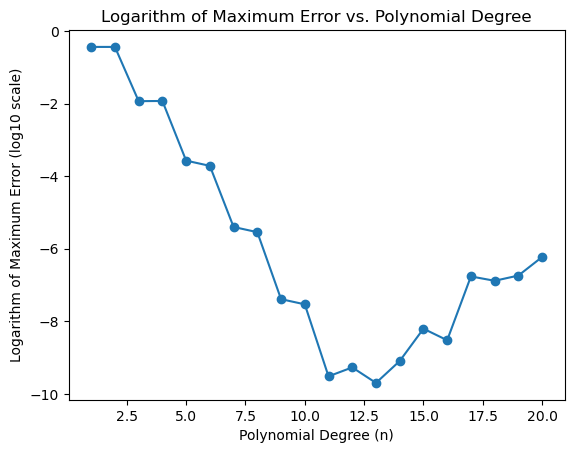

In [13]:
def func(x):
    return np.sin(x)


degrees = np.arange(1, 21)
max_errors = []

for degree in degrees:
    nodes = np.linspace(-np.pi/2, np.pi/2, degree+1) #equally spaced nodes
    max_errors.append(maximum_error(nodes, -np.pi/2, np.pi/2, func))
    
#plot result
plt.plot(degrees, np.log10(max_errors), marker='o')
plt.title('Logarithm of Maximum Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Logarithm of Maximum Error (log10 scale)')
plt.show()

##### Observation

The observed graph illustrates an initial decrease in error as the polynomial degree (n) increases. However, this decreases is not consistently smooth. It exhibits iregular patterns, suggesting a nonlinear relationship between n and the error. Notably, significant reductions in error are noticeable for every two-unit increase in n. At n=11, the error reaches its minimum value, at approximately ~10^-9.

Suprisingly, as n continues to grow beyond 11, the error starts to increase again. This unexpected behavior could be attributed to the Runge phenomenon. Runge's phenomenon occurs when higher-degree interpolating polynomials, especially with equally spaced nodes, lead to oscillations and overshooting in regions of the functions. As a result, even though more nodes are being added, the accuracy of the interpolation diminishes due to these oscillations, leading to an increase in error.

This phenomenon highlights the delicate balance between adding nodes to increase accuracy and the inherent limitations of interpolating high-degree polynomials, particularly with equally spaced nodes. (which is the case here)

Note: Although, these errors are a lot better than the ones obtained with "random nodes" that I used in question 2.

### Equally spaced nodes for e^(cos(x)) in interval [0, pi]
We pick e^cos(x) as suggested in the lab

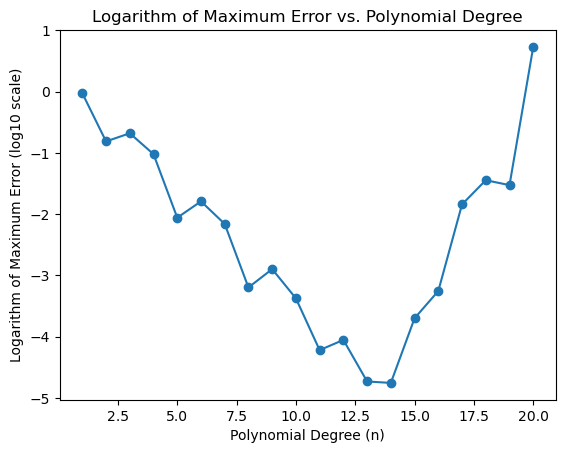

In [14]:
def func2(x):
    return np.exp(np.cos(x))


degrees2 = np.arange(1, 21)
max_errors2 = []

for degree in degrees2:
    nodes2 = np.linspace(0, np.pi, degree+1) #equally spaced nodes
    
    max_errors2.append(maximum_error(nodes2, 0, np.pi, func2))
    
#plot result
plt.plot(degrees2, np.log10(max_errors2), marker='o')
plt.title('Logarithm of Maximum Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Logarithm of Maximum Error (log10 scale)')
plt.show()

##### Observation

The observed graph illustrates an initial decrease in error as the polynomial degree (n) increases. However, this reduction is far from smooth, exhibiting irregular patterns that imply nonlinear relationship between n and the error. Notably, the error alternates, it goes lower than slightly higher to finally go slightly lower to then go a lot lower. The minimal maximum error is achieved at n ~ 13-14, reaching approximately 10^-5, which, although commendable, falls short of the precision achieved for sin(x).

Suprisingly, similar to the pattern observed in sin(x), the error starts to rise again as the number increases beyond ~14. Unlike sin(x), this increase is notably faster, and at n=20, the error surpasses that at n=2. This behavior indicates the intricate challenges associated with interpolating e^cos(x) using Lagrange interpolation, where higher-degree polynomial may introduce oscillations and inaccuraices in the approximation. (Runge phenomenon we extensively talked about for sin(x)).

*Runge's phenomenon occurs when higher-degree interpolating polynomials, especially with equally spaced nodes, lead to oscillations and overshooting in regions of the functions. As a result, even though more nodes are being added, the accuracy of the interpolation diminishes due to these oscillations, leading to an increase in error.

## d) Runge phenomenon 

Def: In numerical analysis, Runge's phenomenon refers to the issues of oscillations occurring at the edges of an interval when employing polynomial interpolation with high-degree polynomials over a set of equally spaced interpolation points.

I am going to use this function: f(x) = e^(-20x^2) in the interval [-1, 1] to expose Runge's phenomenon.

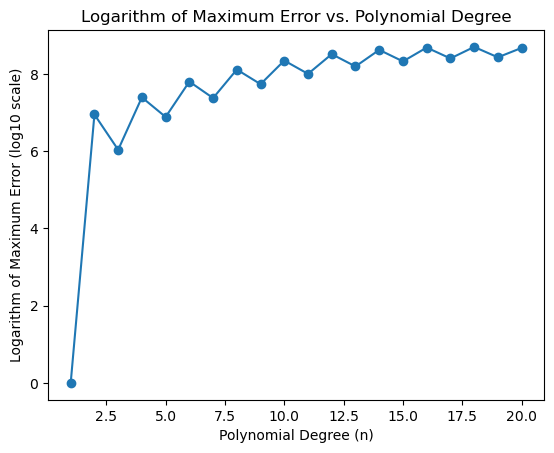

In [15]:
def rung_func(x):
    return np.exp(-20*(x*x))


degrees3 = np.arange(1, 21)
max_errors3 = []

for degree in degrees3:
    nodes3 = np.linspace(-1, 1, degree+1) #equally spaced nodes
    
    max_errors3.append(maximum_error(nodes3, -1, 1, rung_func))
    
#plot result
plt.plot(degrees3, np.log10(max_errors3), marker='o')
plt.title('Logarithm of Maximum Error vs. Polynomial Degree')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Logarithm of Maximum Error (log10 scale)')
plt.show()

We want big error, because we want to showcase Runge phenomenon, so lets pick n=15 and n=20.

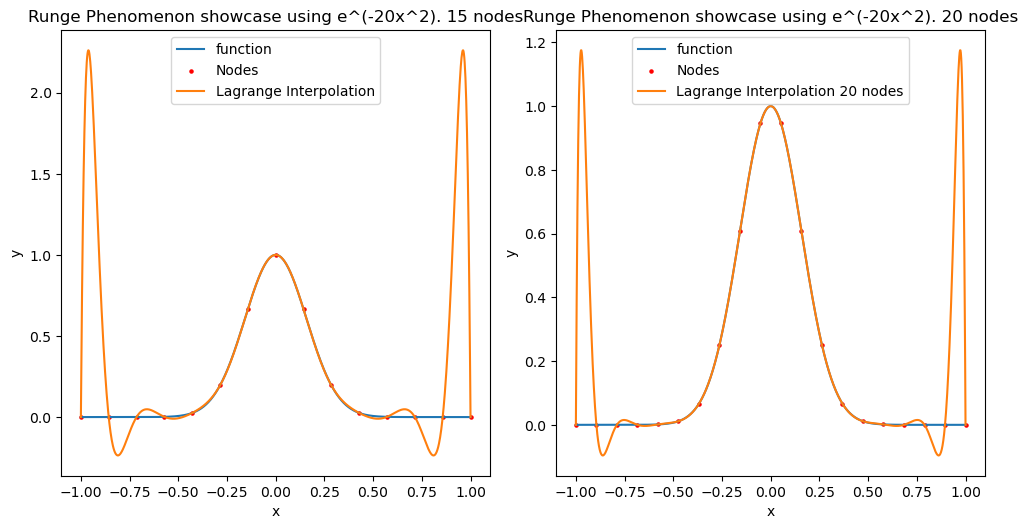

In [16]:
# Generate nodes in the interval (0.1, 4.0] with a step size of 0.01 for 1000 nodes
nodes_15 = np.linspace(-1, 1, 15)
nodes_20 = np.linspace(-1, 1, 20)

# Compute coefficients and interpolate
coefficients_15 = Vendermonde_coefficients(nodes_15, rung_func)
coefficients_20 = Vendermonde_coefficients(nodes_20, rung_func)

# Generate values for smooth plot
x_smooth = np.linspace(-1, 1, 1000)
y_f_smooth = rung_func(x_smooth)
y_interp_smooth_15 = [Vendermonde_interpolation(coefficients_15, x) for x in x_smooth]
y_interp_smooth_20 = [Vendermonde_interpolation(coefficients_20, x) for x in x_smooth]

# Plot the results
plt.figure(figsize=(15, 10))

#15 nodes
plt.subplot(2, 3, 1)
plt.plot(x_smooth, y_f_smooth, label='function')
plt.scatter(nodes_15, rung_func(nodes_15), color='red', s=5, label='Nodes')
plt.plot(x_smooth, y_interp_smooth_15, label='Lagrange Interpolation')
plt.title('Runge Phenomenon showcase using e^(-20x^2). 15 nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


#20 nodes
plt.subplot(2, 3, 2)
plt.plot(x_smooth, y_f_smooth, label='function')
plt.scatter(nodes_20, rung_func(nodes_20), color='red', s=5, label='Nodes')
plt.plot(x_smooth, y_interp_smooth_20, label='Lagrange Interpolation 20 nodes')
plt.title('Runge Phenomenon showcase using e^(-20x^2). 20 nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

#### Observation

Equispaced interpolation points, while seemingly straightforward and evenly distributed, pose a problem when employed with high-degrees polynomials. As the degree of the polynomial increases, the oscillation at the edges of the interval becomes more pronounced, resulting in significant errors. This is due to the nature of the polynomials, which when subjected to high-degree interpolation, tend to oscillate widely, leading to poorer approximation of the target function.

In our graph, the Runge phenomenon becomes evident in the oscillation behavior observed near the boundaries, specifically in the intervals [-1, -0.75] and [0.74, 1]. While interpolation is generally accurate elsewhere, these regions suffer from the amplification of oscillations, causing a notable deviation from the actual function values. THIS IS THE RUNGE PHENOMENON.

In essence, the Runge phenomenon emphasize a crucial trade-off in interpolation: while increasing the degree of the polynomial might improve accuracy in certain regions, it simultaneously introduces oscillations and amplifies errors, particularly at the boundaries. This phenomenon serves as a cautionary note in numerical analysis, emphasizing the importance of selecting the interpolation nodes.

## e) Chebyshev nodes.

We use the same function; f(x) = e^(-20x^2), in the interval [-1, 1].

Use the following formula we saw in class: xk =cos((2k-1)pi/2n), k = 1, ..., n

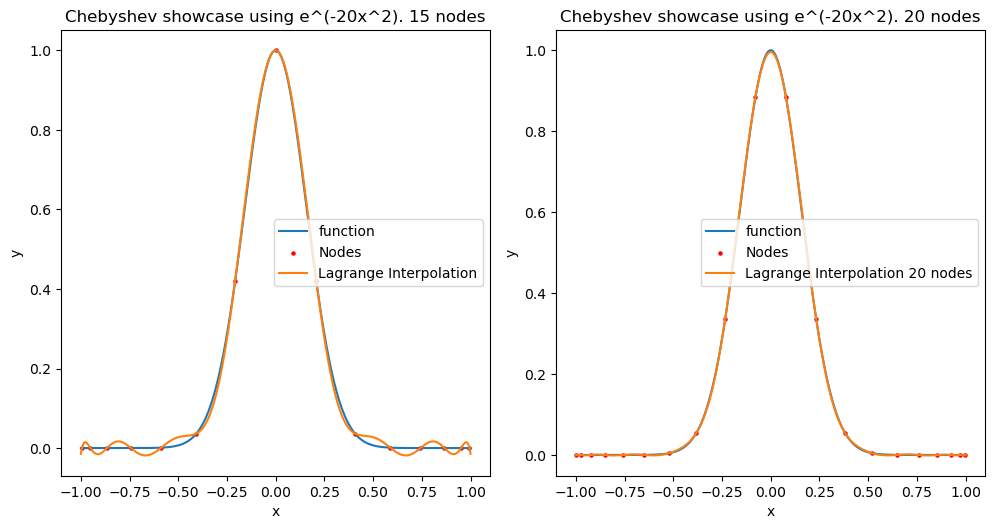

In [17]:
#Since we are only doing one function, the interval will always be [-1,1]
def chebychevNodes(n):
    k = np.arange(1, n+1)
    return np.cos(((2*k - 1)*np.pi)/(2*n)) #Use the formula

    
# Generate nodes in the interval (0.1, 4.0] with a step size of 0.01 for 1000 nodes
nodes_15 = chebychevNodes(15)
nodes_20 = chebychevNodes(20)

# Compute coefficients and interpolate
coefficients_15 = Vendermonde_coefficients(nodes_15, rung_func)
coefficients_20 = Vendermonde_coefficients(nodes_20, rung_func)

# Generate values for smooth plot
x_smooth = np.linspace(-1, 1, 1000)
y_f_smooth = rung_func(x_smooth)
y_interp_smooth_15 = [Vendermonde_interpolation(coefficients_15, x) for x in x_smooth]
y_interp_smooth_20 = [Vendermonde_interpolation(coefficients_20, x) for x in x_smooth]

# Plot the results
plt.figure(figsize=(15, 10))

#15 nodes
plt.subplot(2, 3, 1)
plt.plot(x_smooth, y_f_smooth, label='function')
plt.scatter(nodes_15, rung_func(nodes_15), color='red', s=5, label='Nodes')
plt.plot(x_smooth, y_interp_smooth_15, label='Lagrange Interpolation')
plt.title('Chebyshev showcase using e^(-20x^2). 15 nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


#20 nodes
plt.subplot(2, 3, 2)
plt.plot(x_smooth, y_f_smooth, label='function')
plt.scatter(nodes_20, rung_func(nodes_20), color='red', s=5, label='Nodes')
plt.plot(x_smooth, y_interp_smooth_20, label='Lagrange Interpolation 20 nodes')
plt.title('Chebyshev showcase using e^(-20x^2). 20 nodes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()      

#### Observation

The graphs clearly show that employing Chebyshev nodes lead to more accurate interpolations as the number of nodes increases. Notably, the characteristic oscillations near the boundaries, a consequence of the Runge phenomenon, are significantly reduced and eventually eliminated. In the case of 15 Chebyshev nodes (left graph), there is still a slight oscillation near the edges, but with 20 Chebyshev nodes, the interpolation becomes remarkably accurate without any observable oscillations. This observation supports the conclusion that Chebyshev nodes effectively mitigate and practically eliminate the Runge phenomenon, aligning with the intended purpose of using Chebyshev nodes in the interpolation.

Now, to further reinforce our observation, lets graph the logarithm of error:

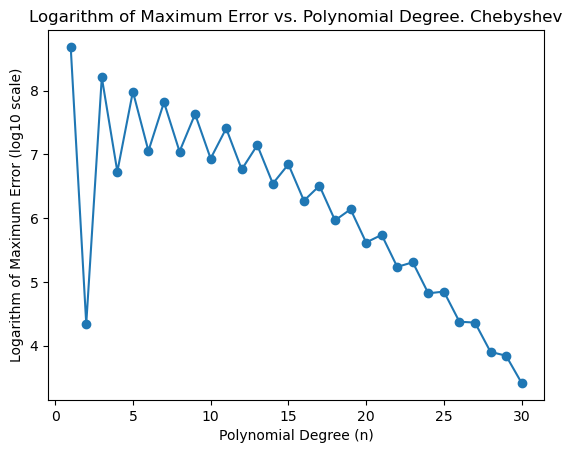

In [18]:
degrees4 = np.arange(1, 31)
max_errors4 = []

for degree in degrees4:
    nodes4 = chebychevNodes(degree)
    max_errors4.append(maximum_error(nodes4, -1, 1, rung_func))
    
# Plot result
plt.plot(degrees4, np.log10(max_errors4), marker='o')
plt.title('Logarithm of Maximum Error vs. Polynomial Degree. Chebyshev')
plt.xlabel('Polynomial Degree (n)')
plt.ylabel('Logarithm of Maximum Error (log10 scale)')
plt.show()

Weirdly high error, this doesn't feel representative of the graphs we got, so let me print some values to make sure (I will only check high degrees as they are the ones that we are interested in):

In [19]:
# Specify the degrees
degrees_to_check = [15, 20, 25, 30]

# Loop over the degrees and print the results
for degree in degrees_to_check:
    # Generate Chebyshev nodes
    nodes = chebychevNodes(degree)
    
    # Compute maximum relative error
    max_error = maximum_error(nodes, -1, 1, rung_func)
    
    # Print the result
    print(f"{degree} Chebyshev nodes Maximum Relative error: {max_error}")

15 Chebyshev nodes Maximum Relative error: 6996737.184016825
20 Chebyshev nodes Maximum Relative error: 415846.4480832956
25 Chebyshev nodes Maximum Relative error: 70736.89848125592
30 Chebyshev nodes Maximum Relative error: 2613.540596126495


This is still very big error, probably because the values of e^(-20x^2) are super small when close to -1 and 1 that a small difference gives a big relative difference, so lets take a look at absolutes errors:

In [20]:
def maximum_absolute_error(nodes, a, b, true_function, resolution=1000):
    # We get 1000 equally spaced nodes
    x_values = np.linspace(a, b, resolution)
    
    # We get the coefficients
    coeff = Vendermonde_coefficients(nodes, true_function)
    
    # We get the y values for true and interpolation
    y_inter = [Vendermonde_interpolation(coeff, x) for x in x_values]
    y_true = true_function(x_values)
    
    # We compute the absolute error:
    errors = np.abs(y_true - y_inter)
    
    max_error = np.max(errors)
    return max_error

# Example usage:
nodes_15 = chebychevNodes(15)
nodes_20 = chebychevNodes(20)
nodes_25 = chebychevNodes(25)
nodes_30 = chebychevNodes(30)

max_error_15 = maximum_absolute_error(nodes_15, -1, 1, rung_func)
max_error_20 = maximum_absolute_error(nodes_20, -1, 1, rung_func)
max_error_25 = maximum_absolute_error(nodes_25, -1, 1, rung_func)
max_error_30 = maximum_absolute_error(nodes_30, -1, 1, rung_func)

print("15 Chebyshev nodes Maximum Absolute error:", max_error_15)
print("20 Chebyshev nodes Maximum Absolute error:", max_error_20)
print("25 Chebyshev nodes Maximum Absolute error:", max_error_25)
print("30 Chebyshev nodes Maximum Absolute error:", max_error_30)

15 Chebyshev nodes Maximum Absolute error: 0.020645001185246356
20 Chebyshev nodes Maximum Absolute error: 0.004384441245927517
25 Chebyshev nodes Maximum Absolute error: 0.0001669400513810552
30 Chebyshev nodes Maximum Absolute error: 1.6923756482212227e-05


In [21]:
#Approximate value at which we have an error
print(0.02064608176347042/6996737.184016825)
print(1.6930956467597902e-05/2613.540596126495)

2.9508156760030696e-09
6.478168539907557e-09


That is what I thought, there is a big relative error because there is a big difference for numbers that are extremely small, that is why we can't see it (with naked eye) on the graphs.

But, still, we conclude that using Chebyshev nodes allow us to make much more accurate interpolation for our functions by mitigating the impact of Runge's phenomenon. (See all we talked about above)

## f) Piecewise linear interpolation

Implementation as we saw. Create a linear function between each pair of nodes.

In [22]:
def piecewise_interpolation(a, b, n, f):
    #Get nodes
    nodes = np.linspace(a, b, n)
    y_values = f(nodes)
    def compute(x):
        #Find indices of nodes in between
        indices = np.searchsorted(nodes, x, side="left") - 1
        #Calculate the interpolation
        x0 = nodes[indices]
        x1 = nodes[indices+1]
        y0 = y_values[indices]
        y1 = y_values[indices+1]
    
        #Calculate linear interpolation
        slope = (y1 - y0)/(x1 - x0)
        return y0 + slope*(x-x0)    
    return compute


#### Showcase with examples 
##### We start with f(x) = cos(x) in interval [0, pi]

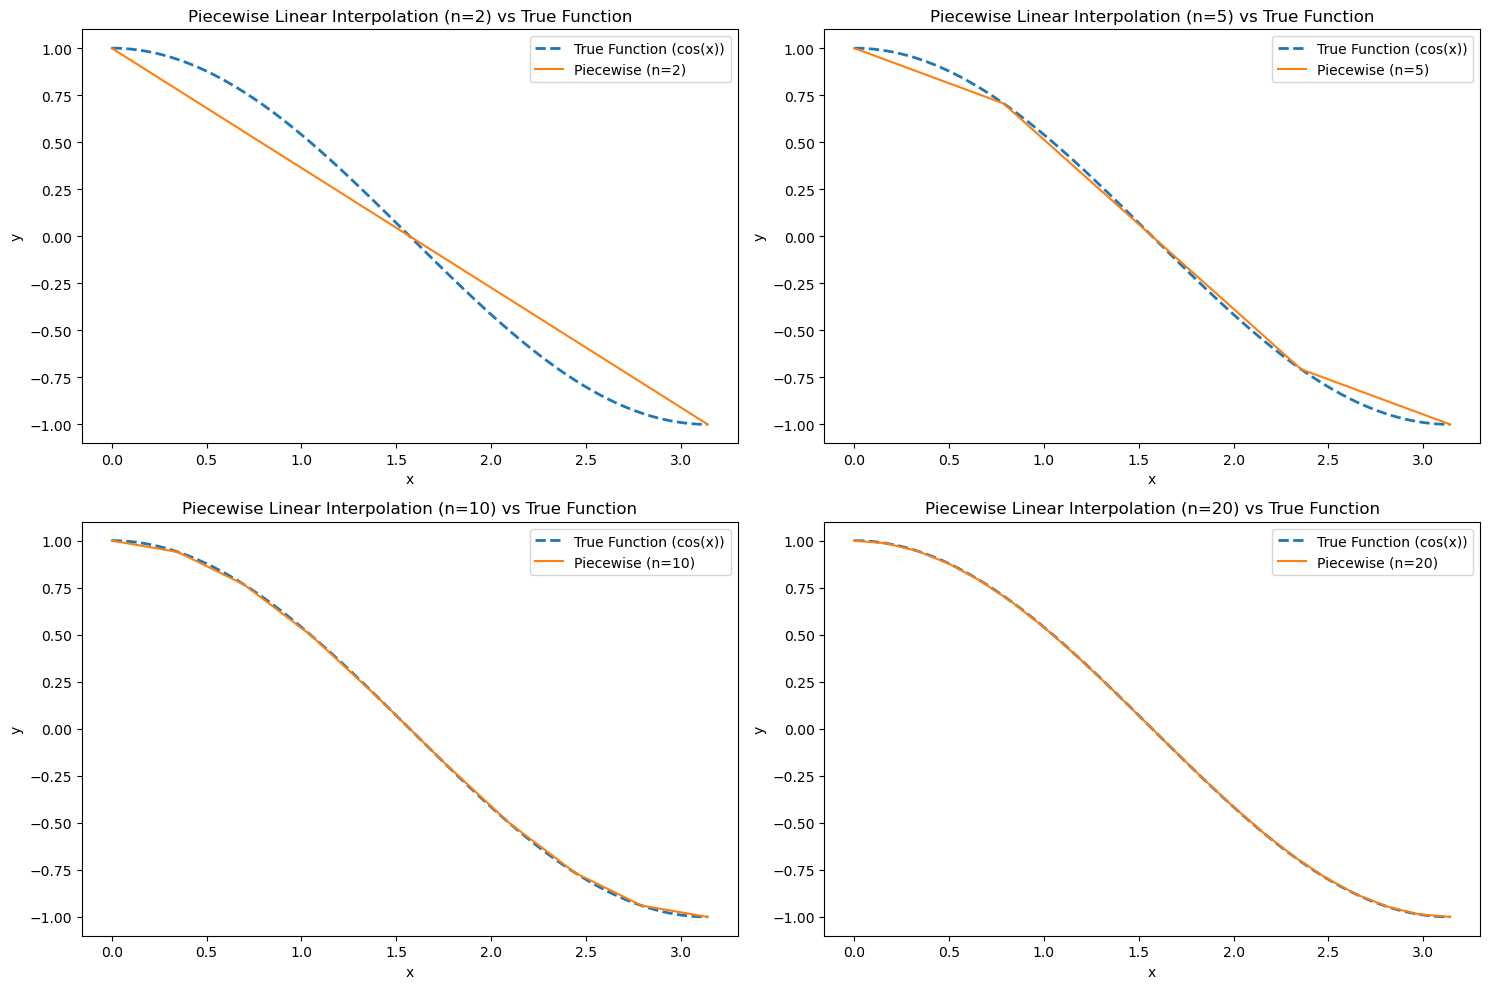

In [23]:
def f(x):
    return np.cos(x)

# Get values
n_values = [2, 5, 10, 20]
x_values = np.linspace(0, np.pi, 1000)
y_true = f(x_values)

plt.figure(figsize=(15, 10))

# Plot the piecewise linear interpolations for different n
for i, n in enumerate(n_values, 1):
    # Create the piecewise linear interpolation function
    piecewise_interp = piecewise_interpolation(0, np.pi, n, f)
    
    # Create subplot
    plt.subplot(2, 2, i)

    # Plot the true function
    plt.plot(x_values, y_true, label='True Function (cos(x))', linewidth=2, linestyle='dashed')
    
    # Plot the piecewise linear interpolation
    plt.plot(x_values, piecewise_interp(x_values), label=f'Piecewise (n={n})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Piecewise Linear Interpolation (n={n}) vs True Function')

plt.tight_layout()
plt.show()

#### Observation

As expected, the piecewise linear interpolation becomes more accurate with an increasing number of nodes. Specifically, for 10 and 20 nodes, we achieve a highly accurate approximation of the true function (cos(x)).

Just as a confirmation for error I will print some values:

In [24]:
def maximum_errorPi(n, a, b, true_function, resolution=10000):
    #We get 10000 equally spaced nodes
    x_values = np.linspace(a, b, resolution)
    #We get the coefficients
    interpo = piecewise_interpolation(a, b, n, true_function)
    y_inter = interpo(x_values)
    y_true = true_function(x_values)
    #We compute the error:
    errors = np.abs((y_true - y_inter)/(np.abs(y_true)))
    max_error = np.max(errors)
    return max_error

# Get values
n_values = [10, 20, 30, 40, 50]

# Print maximum relative errors
for n in n_values:
    max_error = maximum_errorPi(n, 0, np.pi, f)
    
    # Print result
    print(f"{n} nodes, Maximum relative error: {max_error}")

10 nodes, Maximum relative error: 0.015632418616082618
20 nodes, Maximum relative error: 0.0035208942049768654
30 nodes, Maximum relative error: 0.0015122979583022033
40 nodes, Maximum relative error: 0.000836354446251369
50 nodes, Maximum relative error: 0.0005298768281657144


The above confirms my previous statement.

#### Example g(x) = x^3 in interval [-8, 8]

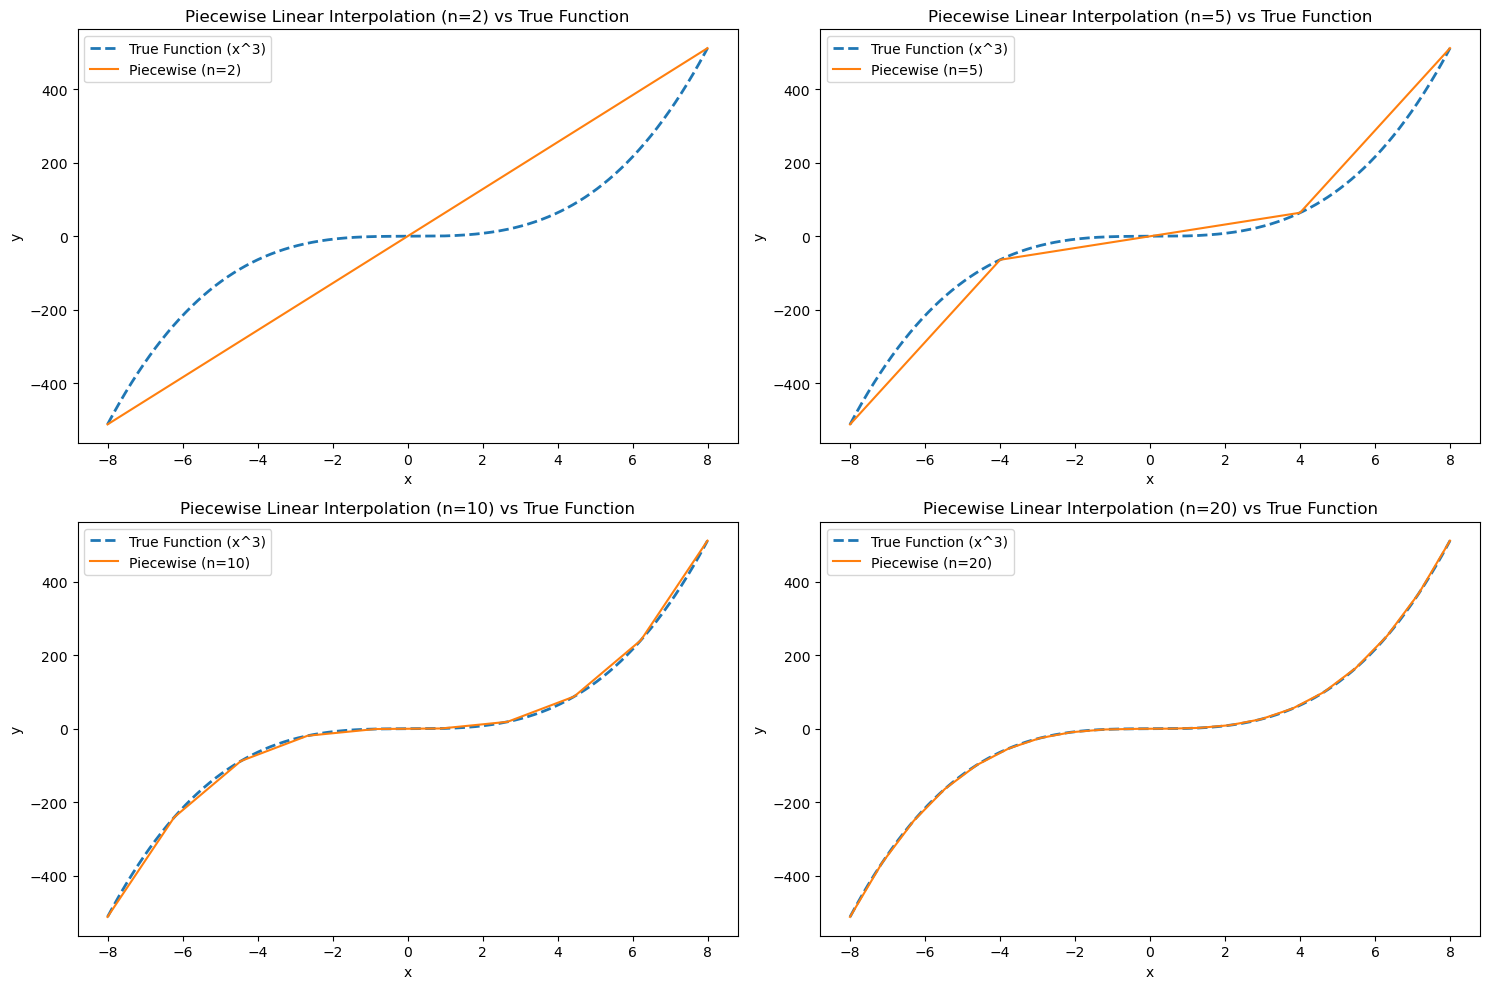

In [25]:
def g(x):
    return x*x*x

#Get values
n_values = [2, 5, 10, 20]
x_values = np.linspace(-8, 8, 1000)
y_true = g(x_values)

plt.figure(figsize=(15, 10))

# Plot the piecewise linear interpolations for different n
for i, n in enumerate(n_values, 1):
    # Create the piecewise linear interpolation function
    piecewise_interp = piecewise_interpolation(-8, 8, n, g)
    
    # Create subplot
    plt.subplot(2, 2, i)

    # Plot the true function
    plt.plot(x_values, y_true, label='True Function (x^3)', linewidth=2, linestyle='dashed')
    
    # Plot the piecewise linear interpolation
    plt.plot(x_values, piecewise_interp(x_values), label=f'Piecewise (n={n})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Piecewise Linear Interpolation (n={n}) vs True Function')

plt.tight_layout()
plt.show()

##### Observation

(Again) As expected, the piecewise linear interpolation becomes more accurate with an increasing number of nodes. Specifically, for 20 nodes, we achieve a highly accurate approximation of the true function (x^3).

#### Example h(x) = 1/x in interval [0.5, 4]

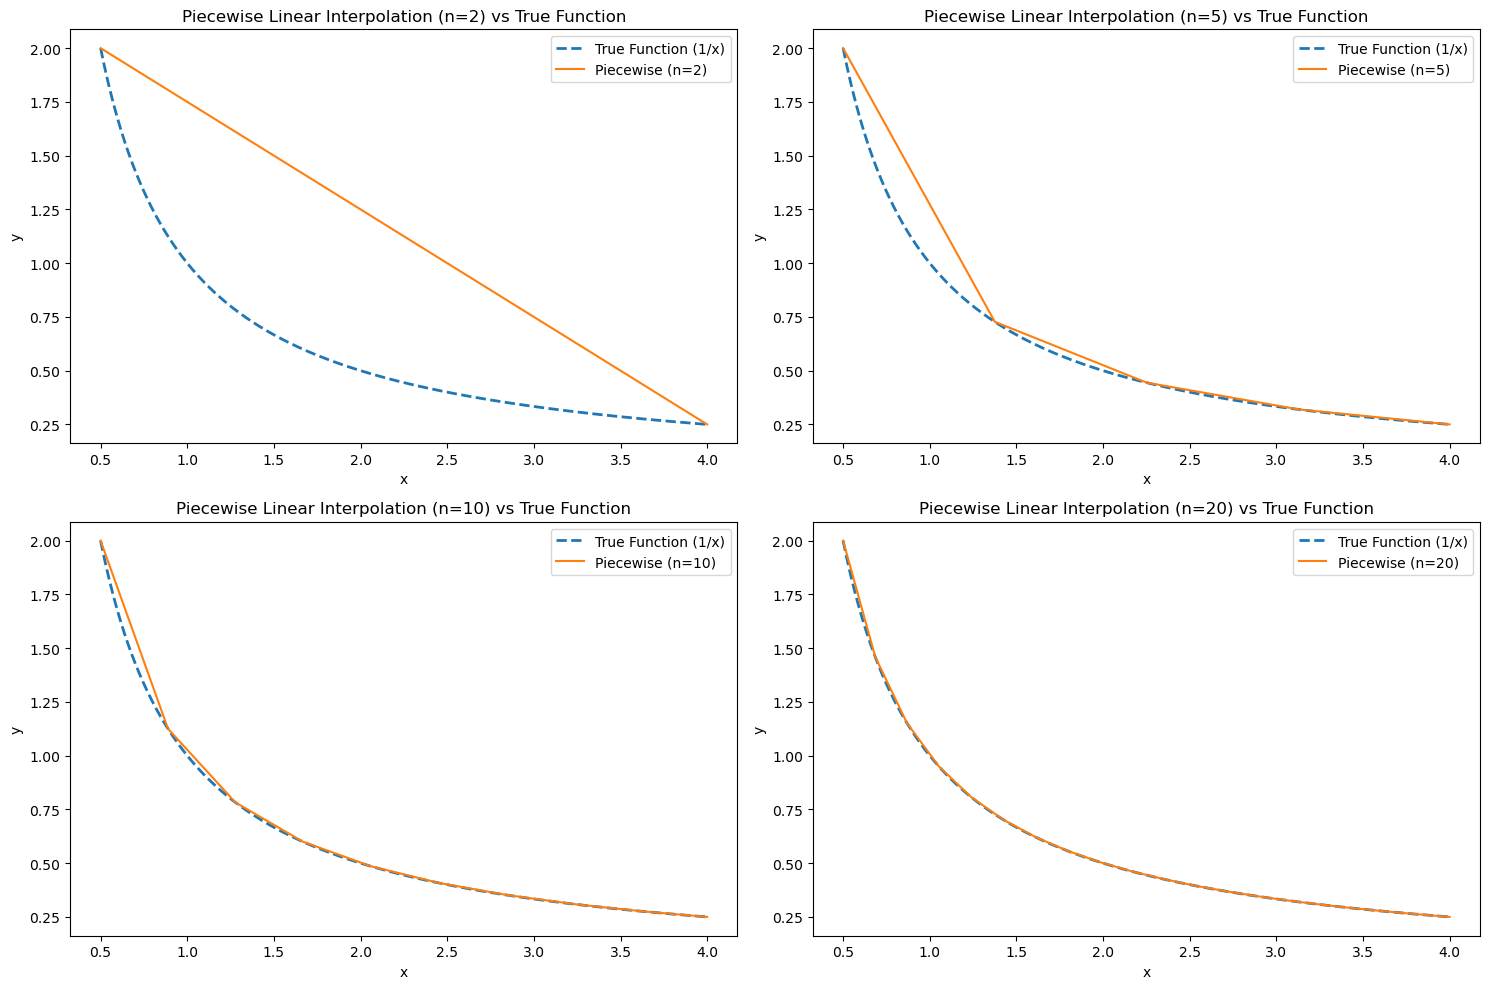

In [26]:
def h(x):
    return 1/x

#Get values
n_values = [2, 5, 10, 20]
x_values = np.linspace(0.5, 4, 1000)
y_true = h(x_values)

plt.figure(figsize=(15, 10))

# Plot the piecewise linear interpolations for different n
for i, n in enumerate(n_values, 1):
    # Create the piecewise linear interpolation function
    piecewise_interp = piecewise_interpolation(0.5, 4, n, h)
    
    # Create subplot
    plt.subplot(2, 2, i)

    # Plot the true function
    plt.plot(x_values, y_true, label='True Function (1/x)', linewidth=2, linestyle='dashed')
    
    # Plot the piecewise linear interpolation
    plt.plot(x_values, piecewise_interp(x_values), label=f'Piecewise (n={n})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Piecewise Linear Interpolation (n={n}) vs True Function')

plt.tight_layout()
plt.show()

##### Observation

(Again) As expected, the piecewise linear interpolation becomes more accurate with an increasing number of nodes. Specifically, for 20 nodes, we achieve a highly accurate approximation of the true function (1/x). This is really good, because as we saw in question 1, interpolating the function 1/x was extremely difficult, we needed 1000 nodes to get an approriate estimation. Here, we only need 20 nodes.

#### General Conclusion
It's always safe bet to expect piecewise linear interpolation to be accurate when using a large number of nodes. This expectation aligns with the principle of integration, where we aim to divide the function into the smallest possible segments and apply linearity within each segment. (As one of my previous math teacher told me) The fundamental pursuit in mathematics often revolves around representing complex phenomena in linear terms, and piecwise linear interpolation is a practical way to achieve this goal. Hence, the sentiment "As expected" stems from the reliability of this method in capturing intricate functions through linear approximations.

## g) Piecewise quadratic interpolation with equally spaced nodes.

We use a similar approach as piecewise linear interpolation, but this time we use quadratic functions.

In [27]:
def piecewise_quadratic_interpolation(a, b, n, f):
    # Get nodes
    nodes = np.linspace(a, b, n) #make them equally spaced
    y_values = f(nodes) 
    
    def compute(x):
        # Find indices of nodes in between
        indices = np.searchsorted(nodes, x, side="left") - 2
        
        # Calculate the interpolation
        x0 = nodes[indices]
        x1 = nodes[indices+1]
        x2 = nodes[indices+2]
        
        y0 = y_values[indices]
        y1 = y_values[indices+1]
        y2 = y_values[indices+2]
        
        # Calculate quadratic interpolation using lagrange method.
        numerator1 = (x - x1) * (x - x2)
        denominator1 = (x0 - x1) * (x0 - x2)
        q0 = y0 * numerator1 / denominator1
        
        numerator2 = (x - x0) * (x - x2)
        denominator2 = (x1 - x0) * (x1 - x2)
        q1 = y1 * numerator2 / denominator2
        
        numerator3 = (x - x0) * (x - x1)
        denominator3 = (x2 - x0) * (x2 - x1)
        q2 = y2 * numerator3 / denominator3
        
        return q0 + q1 + q2
    
    return compute

#### Showcase with examples

#### 1) f(x) = cos(x) in interval [0, pi]

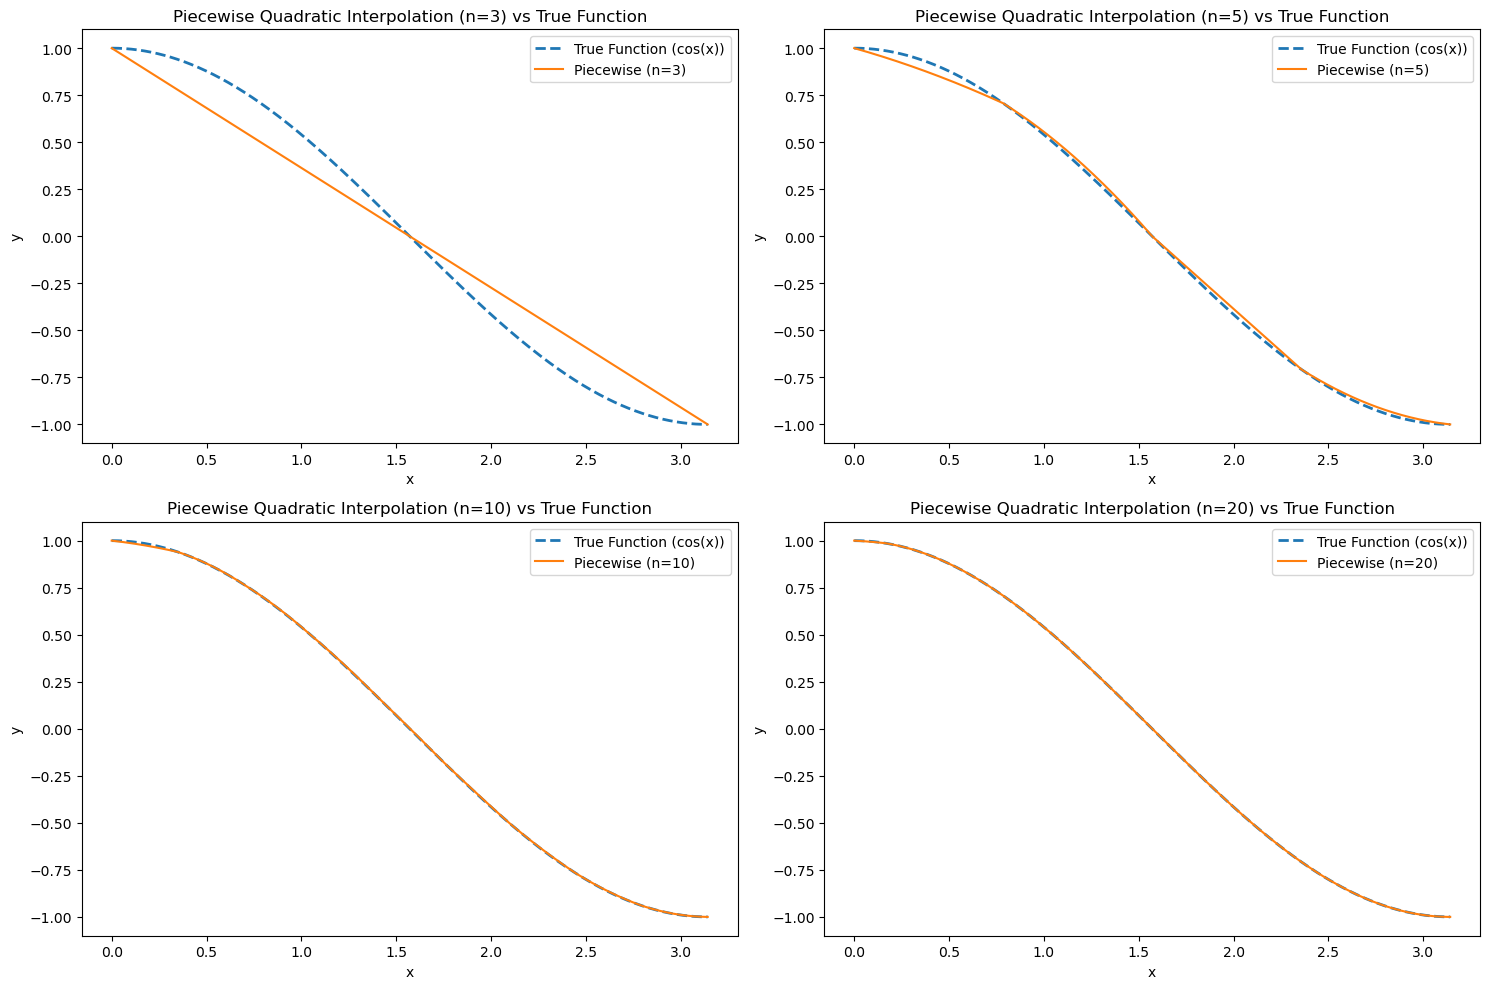

In [28]:
def fq(x):
    return np.cos(x)

# Get values
n_values = [3, 5, 10, 20]
x_values = np.linspace(0, np.pi, 1000)
y_true = fq(x_values)

plt.figure(figsize=(15, 10))

# Plot the piecewise linear interpolations for different n
for i, n in enumerate(n_values, 1):
    # Create the piecewise linear interpolation function
    piecewise_interp = piecewise_quadratic_interpolation(0, np.pi, n, f)
    
    # Create subplot
    plt.subplot(2, 2, i)

    # Plot the true function
    plt.plot(x_values, y_true, label='True Function (cos(x))', linewidth=2, linestyle='dashed')
    
    # Plot the piecewise linear interpolation
    plt.plot(x_values, piecewise_interp(x_values), label=f'Piecewise (n={n})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Piecewise Quadratic Interpolation (n={n}) vs True Function')

plt.tight_layout()
plt.show()

#### Observation

Just like the piecewise linear interpolation, the piecewise quadratic interpolation becomes more accurate with an increasing number of nodes. Specifically, for 10 and 20 nodes, we achieve a highly accurate approximation of the true function (cos(x)).

#### Example 2: g(x) = x in interval [0, 4]

I find this example interesting because it challenges the norm of using quadratic interpolation for functions of lesser degrees. It's an unconvential choice, as quadratic interpolation is generally applied to capture curvature in functions. Despiste the unusual nature of this choice, it presents an interesting exploration into the capabilities and limitations of quadratic interpolation in diverse scenarios.

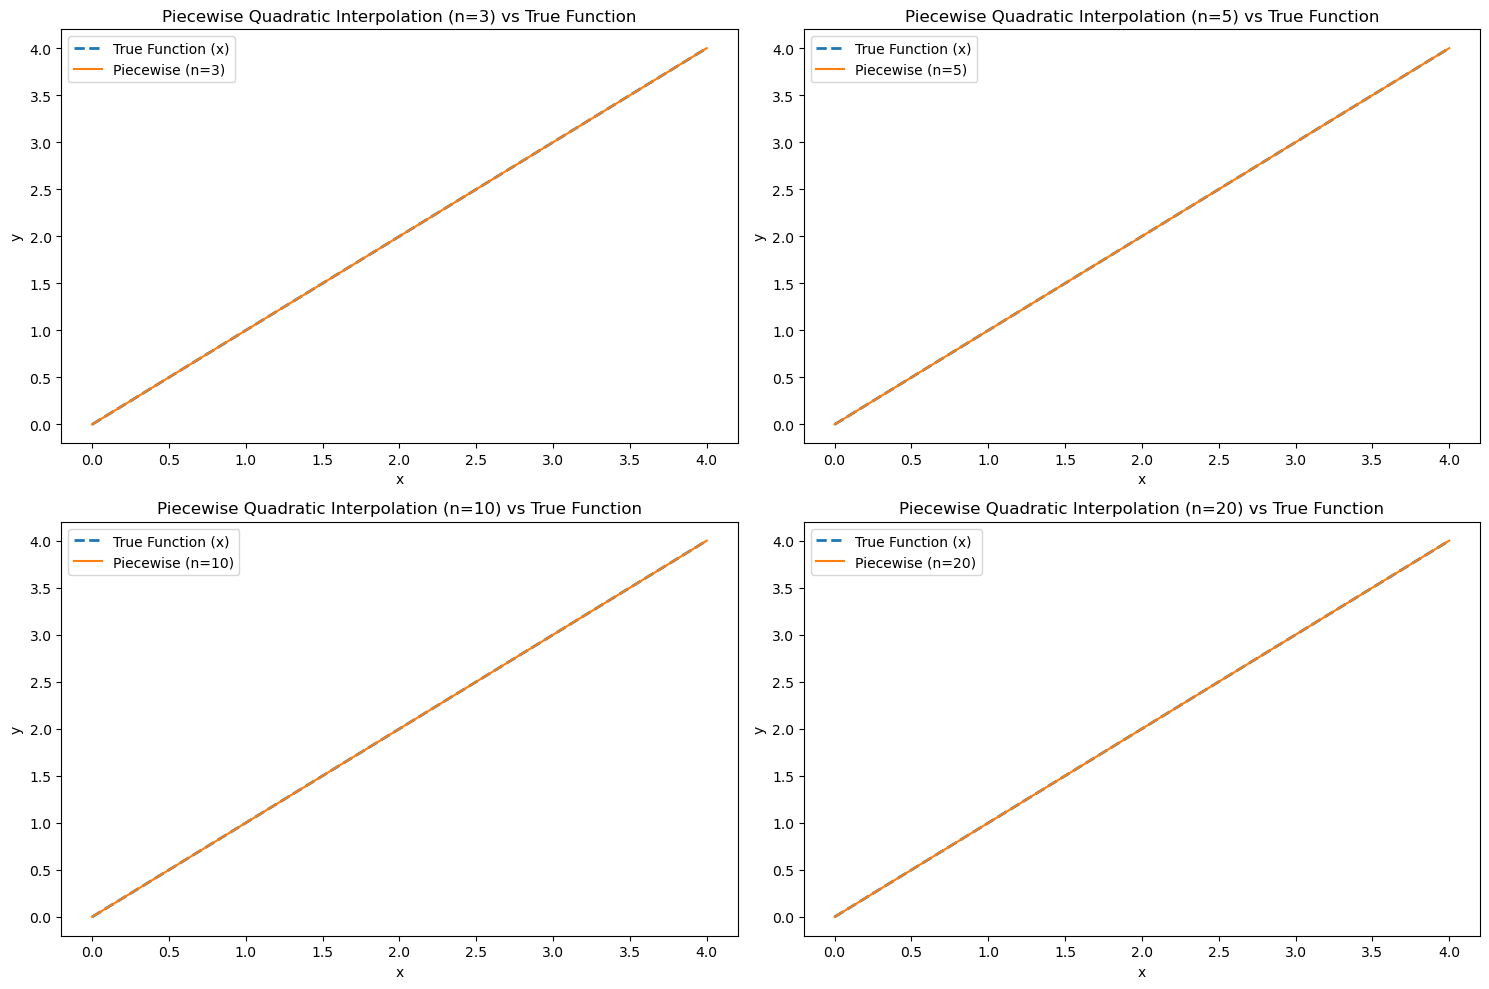

In [29]:
def gq(x):
    return x

# Get values
n_values = [3, 5, 10, 20]
x_values = np.linspace(0, 4, 1000)
y_true = gq(x_values)

plt.figure(figsize=(15, 10))

# Plot the piecewise linear interpolations for different n
for i, n in enumerate(n_values, 1):
    # Create the piecewise linear interpolation function
    piecewise_interp = piecewise_quadratic_interpolation(0, 4, n, gq)
    
    # Create subplot
    plt.subplot(2, 2, i)

    # Plot the true function
    plt.plot(x_values, y_true, label='True Function (x)', linewidth=2, linestyle='dashed')
    
    # Plot the piecewise linear interpolation
    plt.plot(x_values, piecewise_interp(x_values), label=f'Piecewise (n={n})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Piecewise Quadratic Interpolation (n={n}) vs True Function')

plt.tight_layout()
plt.show()

##### Observation

The results clearly demonstrates the remarkable ability of piecewise quadratic interpolation to accurately approximate linear functions. Even with just three nodes, the difference is imperceptible to the naked eye. While this outcome aligns with expectations, it remains intriguing to witness how effortlessly higher-degree piecewise interpolations can approximate functions of lower degrees.

#### Example 3: h(x) = x^4 - 8x^3 + 18x^2 - 14x + 4 in interval [-1, 5]

I am interested in this example since it is a function with a lot of curves and I want to see how good piecewise quadratic interpolation is at approximating "curvy" functions.

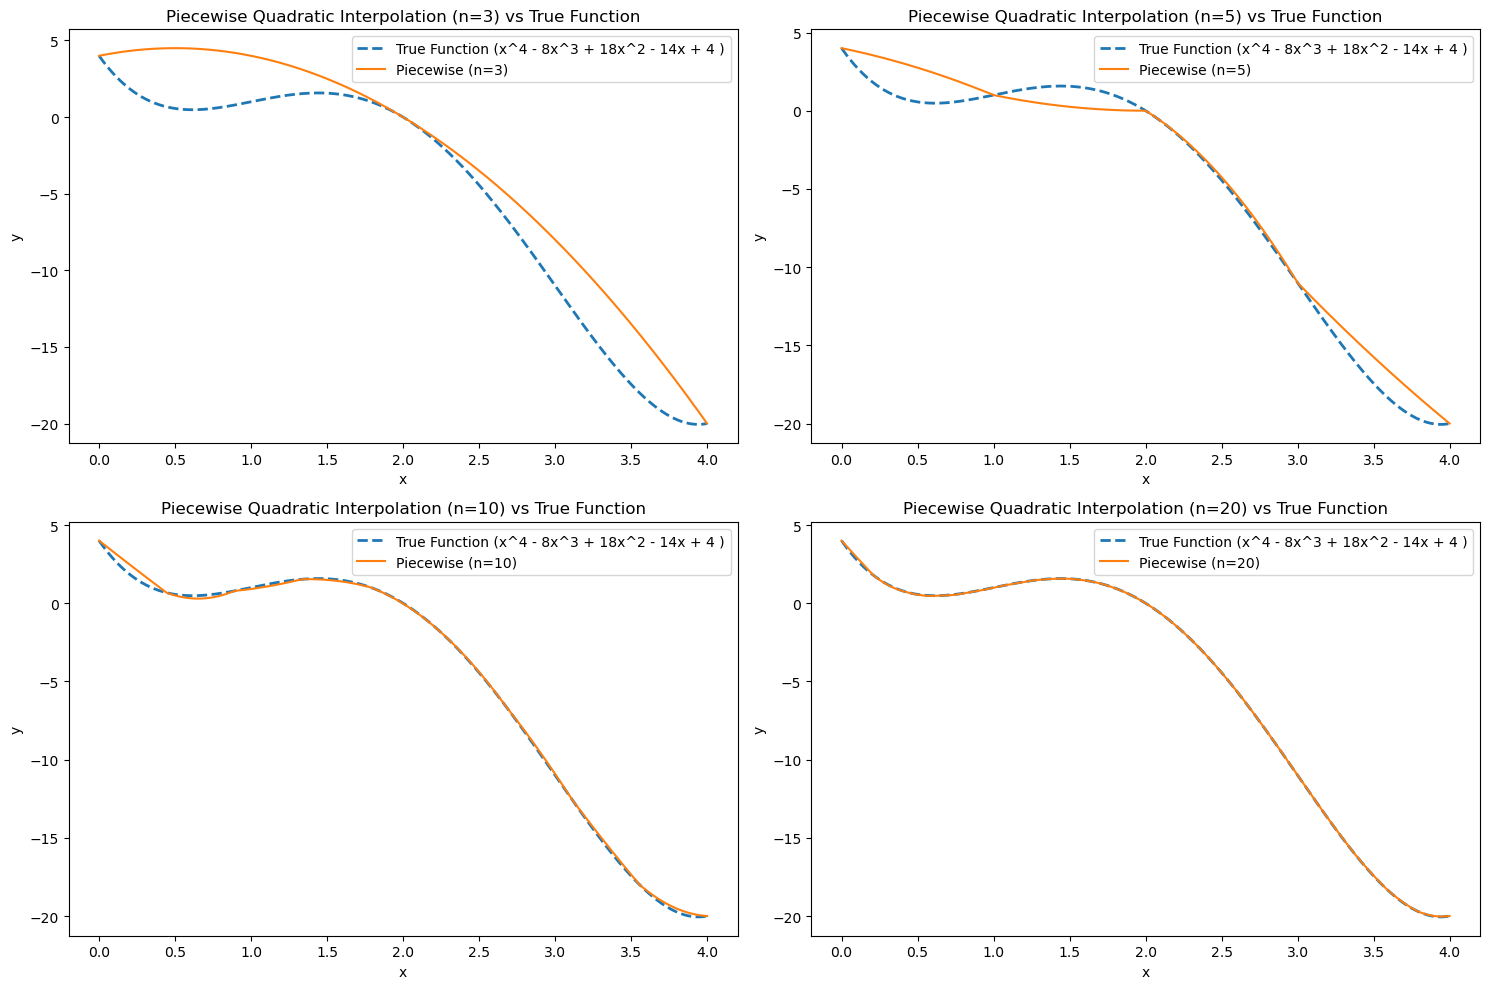

In [30]:
def hq(x):
    return (x*x*x*x) - 8*(x*x*x) + 18*(x*x) - 14*x + 4

# Get values
n_values = [3, 5, 10, 20]
x_values = np.linspace(0, 4, 1000)
y_true = hq(x_values)

plt.figure(figsize=(15, 10))

# Plot the piecewise linear interpolations for different n
for i, n in enumerate(n_values, 1):
    # Create the piecewise linear interpolation function
    piecewise_interp = piecewise_quadratic_interpolation(0, 4, n, hq)
    
    # Create subplot
    plt.subplot(2, 2, i)

    # Plot the true function
    plt.plot(x_values, y_true, label='True Function (x^4 - 8x^3 + 18x^2 - 14x + 4 )', linewidth=2, linestyle='dashed')
    
    # Plot the piecewise linear interpolation
    plt.plot(x_values, piecewise_interp(x_values), label=f'Piecewise (n={n})')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'Piecewise Quadratic Interpolation (n={n}) vs True Function')

plt.tight_layout()
plt.show()

##### Observation

The piecewise quadratic interpolation improves significantly as we increase the number of nodes. Initially, with just 3 nodes (top left), it struggles to capture the complexity of the function, resulting in substantial deviations. Even with 5 nodes (top right), the accuracy is limited. However, as we reach 10 nodes, the differences becomes noticeable only near the function boundaries. Finally, with 20 nodes, the interpolation is so accurate that it is practically indistinguishable from the true function. This observation highlights the effectiveness of piecewise quadratic interpolation, particularly in approximating functions with intricate curves.

# h) Compare piecewise linear and quadratic

As asked in the question, we will compare them using the functions of question 3: sin(x) in interval [0,pi] and the function e^cos(x) in the interval [0, pi].

Then, we compare them with the function from question 4: e^-20x^2 in interval [-1,1].

Note: At first I wanted to do sin in interval [-pi/2, pi/2] exactly like we did in question 3 but we werent seeing anything interesting so I changed the interval to [0, pi]

In [41]:
def piecewise_quadratic_interpolation(a, b, n, f):
    # Get nodes
    nodes = np.linspace(a, b, n) #make them equally spaced
    y_values = f(nodes) 
    
    def compute(x):
        # Find indices of nodes in between
        indices = np.searchsorted(nodes, x, side="left") - 2
        
        # Calculate the interpolation
        x0 = nodes[indices]
        x1 = nodes[indices+1]
        x2 = nodes[indices+2]
        
        y0 = y_values[indices]
        y1 = y_values[indices+1]
        y2 = y_values[indices+2]
        
        # Calculate quadratic interpolation using lagrange method.
        numerator1 = (x - x1) * (x - x2)
        denominator1 = (x0 - x1) * (x0 - x2)
        q0 = y0 * numerator1 / denominator1
        
        numerator2 = (x - x0) * (x - x2)
        denominator2 = (x1 - x0) * (x1 - x2)
        q1 = y1 * numerator2 / denominator2
        
        numerator3 = (x - x0) * (x - x1)
        denominator3 = (x2 - x0) * (x2 - x1)
        q2 = y2 * numerator3 / denominator3
        
        return q0 + q1 + q2
    
    return compute

def piecewise_linear_interpolation(a, b, n, f):
    #Get nodes
    nodes = np.linspace(a, b, n)
    y_values = f(nodes)
    def compute(x):
        #Find indices of nodes in between
        indices = np.searchsorted(nodes, x, side="left") - 1
        #Calculate the interpolation
        x0 = nodes[indices]
        x1 = nodes[indices+1]
        y0 = y_values[indices]
        y1 = y_values[indices+1]
    
        #Calculate linear interpolation
        slope = (y1 - y0)/(x1 - x0)
        return y0 + slope*(x-x0)    
    return compute

def maximum_errorPi(n, a, b, true_function, interpolation, resolution=1000):
    #We get 10000 equally spaced nodes
    x_values = np.linspace(a, b, resolution)
    #We get the coefficients
    interpo = interpolation(a, b, n, true_function)
    y_inter = interpo(x_values)
    y_true = true_function(x_values)
    #We compute the error:
    errors = np.abs((y_true - y_inter)) #need 1e-10 otherwise get division by 0
    max_error = np.max(errors)
    return max_error

### Example 1: f(x) = sin(x) in interval [0, pi]

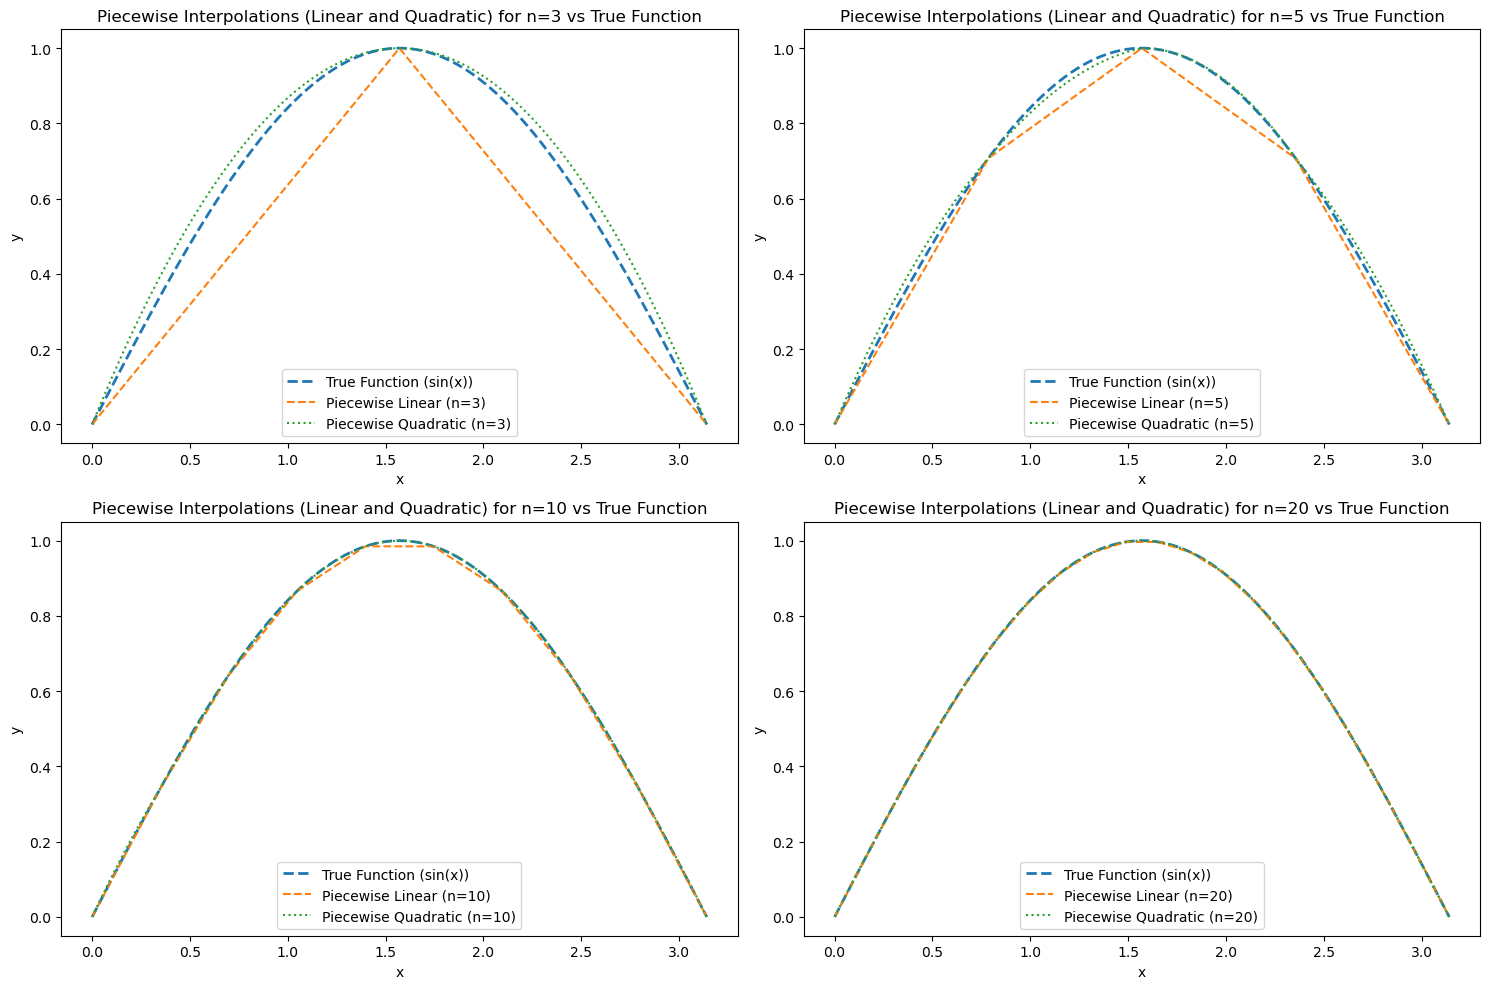

In [42]:
def func(x):
    return np.sin(x)

# Function to create the plots
def plot_interpolations(func, a, b, n_values):
    x_values = np.linspace(a, b, 1000)
    y_true = func(x_values)

    plt.figure(figsize=(15, 10))

    for i, n in enumerate(n_values, 1):
        # Create the piecewise linear interpolation function
        piecewise_linear_interp = piecewise_linear_interpolation(a, b, n, func)
        # Create the piecewise quadratic interpolation function
        piecewise_quadratic_interp = piecewise_quadratic_interpolation(a, b, n, func)

        # Create subplot
        plt.subplot(2, 2, i)

        # Plot the true function
        plt.plot(x_values, y_true, label='True Function (sin(x))', linewidth=2, linestyle='dashed')

        # Plot the piecewise linear interpolation
        plt.plot(x_values, piecewise_linear_interp(x_values), label=f'Piecewise Linear (n={n})', linestyle='--')

        # Plot the piecewise quadratic interpolation
        plt.plot(x_values, piecewise_quadratic_interp(x_values), label=f'Piecewise Quadratic (n={n})', linestyle='dotted')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title(f'Piecewise Interpolations (Linear and Quadratic) for n={n} vs True Function')

    plt.tight_layout()
    plt.show()

# Plot graphs for n = [3, 5, 10, 20]
plot_interpolations(func, 0, np.pi, [3, 5, 10, 20])

#### Observation

On the graphs, we observe that the accuracy of both piecewise linear and quadratic interpolations increase as the number of nodes increases. Initially, with only 3 nodes, the linear interpolation provides a poor approximation of sin(x), while the quadratic interpolation, though imperfect, outperforms greatly the linear one. This trend persists with 5 nodes. By the time we reach 10 nodes, the quadratic interpolation significantly narrows the gap to the true function, sin(x), whereas the linear interpolation still struggles, particularly in approximating sin(x) around pi/2 (the middle of the graph). Finally, at 20 nodes, both piecewise linear and quadratic interpolations approximations becomes indistinguishable from the true sin(x) function, showcasing their improved accuracy.

Lets graph the errors to confirm what I said:

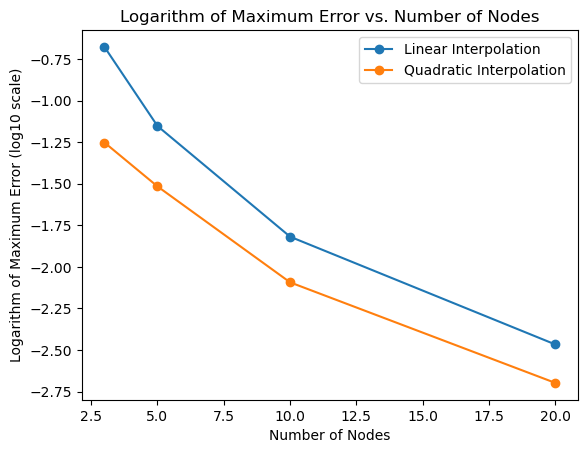

In [43]:
def plot_log_errors(n_values, a, b, true_function, resolution=10000):
    # Arrays to store errors
    errors_linear = []
    errors_quadratic = []

    for n in n_values:
        # Piecewise linear interpolation
        max_error_linear = maximum_errorPi(n, a, b, true_function, piecewise_linear_interpolation, resolution)

        # Piecewise quadratic interpolation
        max_error_quadratic = maximum_errorPi(n, a, b, true_function, piecewise_quadratic_interpolation, resolution)

        # Append errors to arrays
        errors_linear.append(np.log10(max_error_linear))
        errors_quadratic.append(np.log10(max_error_quadratic))

    # Plotting
    plt.plot(n_values, errors_linear, marker='o', label='Linear Interpolation')
    plt.plot(n_values, errors_quadratic, marker='o', label='Quadratic Interpolation')

    plt.title('Logarithm of Maximum Error vs. Number of Nodes')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Logarithm of Maximum Error (log10 scale)')
    plt.legend()
    plt.show()

# Usage
n_values = [3, 5, 10, 20]
plot_log_errors(n_values, 0, np.pi, func)

The above confirms what we said.

### Example 2: g(x) = e^cos(x) in interval [0, pi]

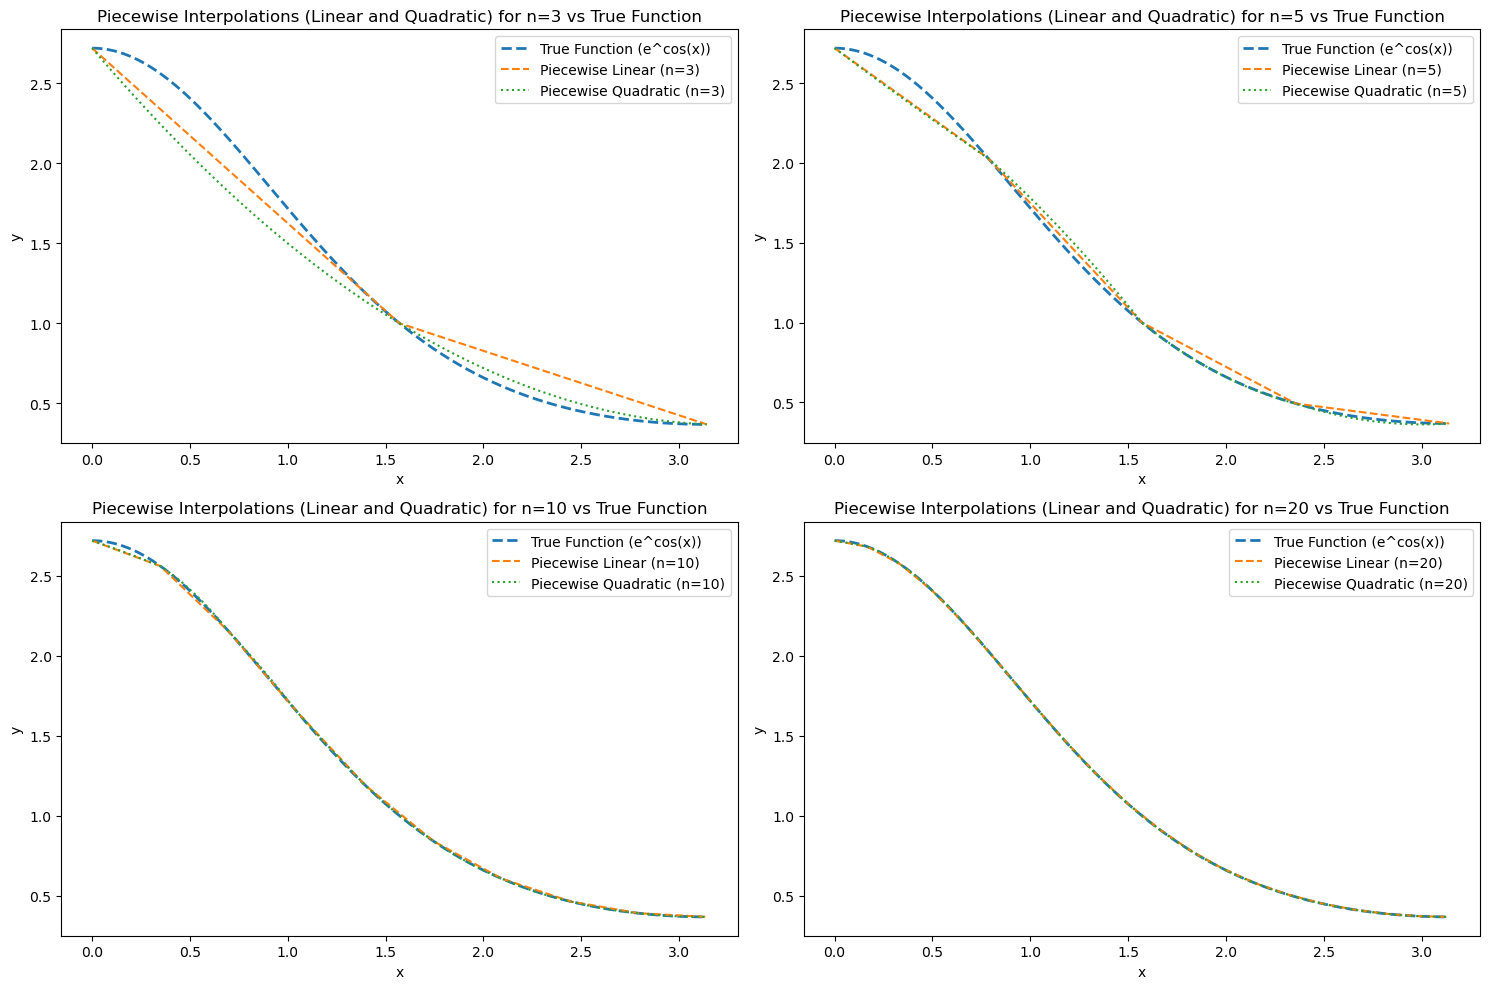

In [34]:
def fun(x):
    return np.exp(np.cos(x))

# Function to create the plots
def plot_interpolations(func, a, b, n_values):
    x_values = np.linspace(a, b, 1000)
    y_true = func(x_values)

    plt.figure(figsize=(15, 10))

    for i, n in enumerate(n_values, 1):
        # Create the piecewise linear interpolation function
        piecewise_linear_interp = piecewise_linear_interpolation(a, b, n, func)
        # Create the piecewise quadratic interpolation function
        piecewise_quadratic_interp = piecewise_quadratic_interpolation(a, b, n, func)

        # Create subplot
        plt.subplot(2, 2, i)

        # Plot the true function
        plt.plot(x_values, y_true, label='True Function (e^cos(x))', linewidth=2, linestyle='dashed')

        # Plot the piecewise linear interpolation
        plt.plot(x_values, piecewise_linear_interp(x_values), label=f'Piecewise Linear (n={n})', linestyle='--')

        # Plot the piecewise quadratic interpolation
        plt.plot(x_values, piecewise_quadratic_interp(x_values), label=f'Piecewise Quadratic (n={n})', linestyle='dotted')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title(f'Piecewise Interpolations (Linear and Quadratic) for n={n} vs True Function')

    plt.tight_layout()
    plt.show()

# Plot graphs for n = [3, 5, 10, 20]
plot_interpolations(fun, 0, np.pi, [3, 5, 10, 20])

#### Observation

On the graphs, we observe that the accuracy of both piecewise linear and quadratic interpolations increase as the number of nodes increases. Initially, with only 3 nodes, surprisingly, the linear interpolation provides better approximation of e^cos(x) than the quadratic interpolation, though really bad. With 5 nodes, the linear interpolation provides a slightly better approximation of e^cos(x) than the quadratic interpolation, though the gap between them is narrowing. By the time we reach 10 nodes, the quadratic interpolation and the linear interpolation are almost identical, though imperfect, as we can still see a slight difference between the true function and both interpolation. Finally, at 20 nodes, both piecewise linear and quadratic interpolations approximations becomes indistinguishable from the true e^cos(x) function, showcasing their improved accuracy.

Lets print some errors to confirm what I just said:

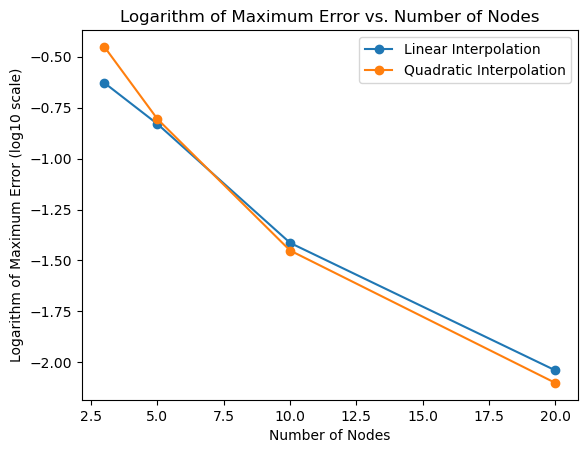

In [44]:
def plot_log_errors(n_values, a, b, true_function, resolution=10000):
    # Arrays to store errors
    errors_linear = []
    errors_quadratic = []

    for n in n_values:
        # Piecewise linear interpolation
        max_error_linear = maximum_errorPi(n, a, b, true_function, piecewise_linear_interpolation, resolution)

        # Piecewise quadratic interpolation
        max_error_quadratic = maximum_errorPi(n, a, b, true_function, piecewise_quadratic_interpolation, resolution)

        # Append errors to arrays
        errors_linear.append(np.log10(max_error_linear))
        errors_quadratic.append(np.log10(max_error_quadratic))

    # Plotting
    plt.plot(n_values, errors_linear, marker='o', label='Linear Interpolation')
    plt.plot(n_values, errors_quadratic, marker='o', label='Quadratic Interpolation')

    plt.title('Logarithm of Maximum Error vs. Number of Nodes')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Logarithm of Maximum Error (log10 scale)')
    plt.legend()
    plt.show()

# Usage
n_values = [3, 5, 10, 20]
plot_log_errors(n_values, 0, np.pi, fun)

The above confirms what I said.

#### Examples 3: h(x) = e^-20x^2 in interval [-1, 1]

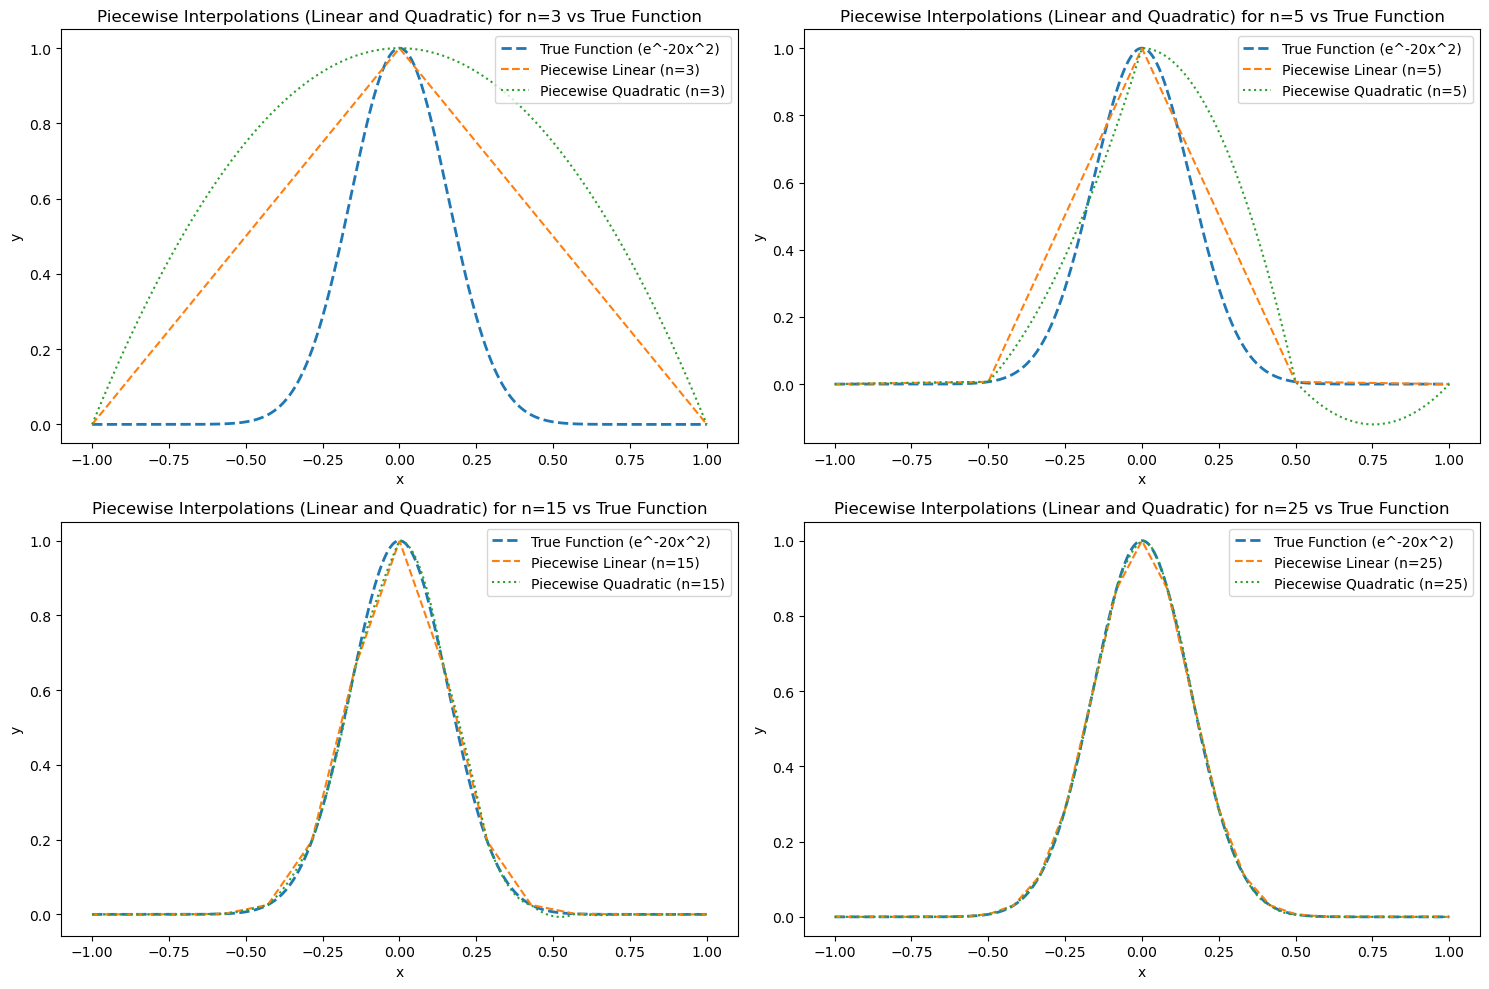

In [48]:
def h(x):
    return np.exp(-20*(x*x))

# Function to create the plots
def plot_interpolations(func, a, b, n_values):
    x_values = np.linspace(a, b, 1000)
    y_true = func(x_values)

    plt.figure(figsize=(15, 10))

    for i, n in enumerate(n_values, 1):
        # Create the piecewise linear interpolation function
        piecewise_linear_interp = piecewise_linear_interpolation(a, b, n, func)
        # Create the piecewise quadratic interpolation function
        piecewise_quadratic_interp = piecewise_quadratic_interpolation(a, b, n, func)

        # Create subplot
        plt.subplot(2, 2, i)

        # Plot the true function
        plt.plot(x_values, y_true, label='True Function (e^-20x^2)', linewidth=2, linestyle='dashed')

        # Plot the piecewise linear interpolation
        plt.plot(x_values, piecewise_linear_interp(x_values), label=f'Piecewise Linear (n={n})', linestyle='--')

        # Plot the piecewise quadratic interpolation
        plt.plot(x_values, piecewise_quadratic_interp(x_values), label=f'Piecewise Quadratic (n={n})', linestyle='dotted')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title(f'Piecewise Interpolations (Linear and Quadratic) for n={n} vs True Function')

    plt.tight_layout()
    plt.show()

# Plot graphs for n = [3, 5, 10, 20]
plot_interpolations(h, -1, 1, [3, 5, 15, 25])

##### Observation

The piecewise quadratic interpolation shows significant limitations with 3 and 5 nodes, performing so poorly that the piecewise linear interpolation is more accurate. For 15 nodes, the piecewise quadratic interpolation, is almost perfect, I can barely see the difference betweeen it and the true function, but the piecewise linear interpolation is now less accurate than the quadratic, especially in the middle where we have a triangle shape whilst the true function is round. For 25 nodes, the piecewise quadratic interpolation is seemingly perfect, I can't tell the difference between it and the true function with my naked eye. The linear interpolation, however, is generally really accurate, but it still struggles to accurately approximate the middle of the function, it sill is a triangle shape.

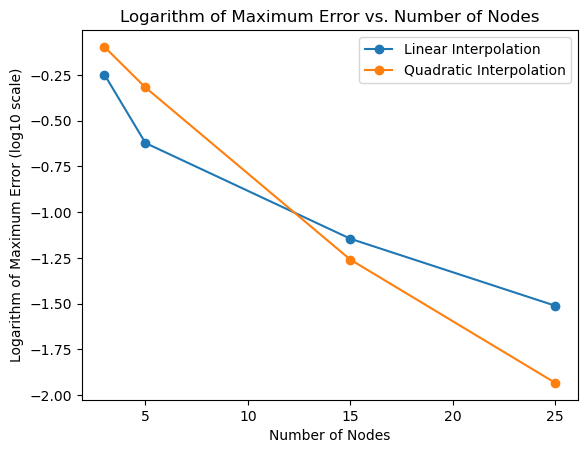

In [49]:
def plot_log_errors(n_values, a, b, true_function, resolution=10000):
    # Arrays to store errors
    errors_linear = []
    errors_quadratic = []

    for n in n_values:
        # Piecewise linear interpolation
        max_error_linear = maximum_errorPi(n, a, b, true_function, piecewise_linear_interpolation, resolution)

        # Piecewise quadratic interpolation
        max_error_quadratic = maximum_errorPi(n, a, b, true_function, piecewise_quadratic_interpolation, resolution)

        # Append errors to arrays
        errors_linear.append(np.log10(max_error_linear))
        errors_quadratic.append(np.log10(max_error_quadratic))

    # Plotting
    plt.plot(n_values, errors_linear, marker='o', label='Linear Interpolation')
    plt.plot(n_values, errors_quadratic, marker='o', label='Quadratic Interpolation')

    plt.title('Logarithm of Maximum Error vs. Number of Nodes')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Logarithm of Maximum Error (log10 scale)')
    plt.legend()
    plt.show()

# Usage
n_values = [3, 5, 15, 25]
plot_log_errors(n_values, -1, 1, h)

This confirms the above.